<a href="https://colab.research.google.com/github/callummcgirl/Dissertation/blob/dissertation/FinalYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SequentialFeatureSelector

from collections import Counter

#Loading Code

In [2]:
file_path = 'Premier League Data 2013-2023.xlsx'
df = pd.read_excel(file_path)

missing_values = df.isnull().sum()

missing_values[missing_values > 0]



Series([], dtype: int64)

In [3]:
df = pd.read_excel(file_path)

df.head()



,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,2013-08-17,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,...,18,4,3,4,5,1,0,1.44,4.75,8.0
1,2013-08-17,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,...,11,12,6,1,1,0,0,1.40,5.00,9.5
2,2013-08-17,Norwich,Everton,2,2,D,0,0,D,M Oliver,...,10,6,8,2,0,0,0,3.20,3.40,2.4
3,2013-08-17,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,...,14,6,1,0,3,0,0,2.30,3.40,3.4
4,2013-08-17,Swansea,Man United,1,4,A,0,2,A,P Dowd,...,10,7,4,1,3,0,0,4.20,3.50,2.0


In [4]:
column_names = df.columns.tolist()
print(column_names)

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']


In [5]:
summary_table = df.describe(include='all').T

summary_table['most_frequent'] = df.mode().iloc[0]
summary_table


,count,unique,top,freq,mean,min,25%,50%,75%,max,std,most_frequent
Date,3800,NaN,NaN,NaN,2018-07-08 19:25:38.526315776,2013-08-17 00:00:00,2016-01-01 06:00:00,2018-06-26 12:00:00,2021-01-27 00:00:00,2023-05-28 00:00:00,NaN,2013-12-26 00:00:00
HomeTeam,3800,33,Arsenal,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal
AwayTeam,3800,33,Crystal Palace,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arsenal
FTHG,3800.0,NaN,NaN,NaN,1.525263,0.0,1.0,1.0,2.0,9.0,1.319022,1.0
FTAG,3800.0,NaN,NaN,NaN,1.216842,0.0,0.0,1.0,2.0,9.0,1.192161,0.0
FTR,3800,3,H,1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H
HTHG,3800.0,NaN,NaN,NaN,0.69,0.0,0.0,0.0,1.0,5.0,0.855563,0.0
HTAG,3800.0,NaN,NaN,NaN,0.544211,0.0,0.0,0.0,1.0,5.0,0.755183,0.0
HTR,3800,3,D,1541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
Referee,3800,41,M Oliver,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M Oliver


#Feature Engineering

Adding new feature - Form over last 5 matches

In [6]:
def calculate_points_form(df, team, match_date, form_window=5):
    past_matches = df[((df['HomeTeam'] == team) | (df['AwayTeam'] == team)) & (df['Date'] < match_date)]

    last_matches = past_matches.sort_values(by='Date', ascending=False).head(form_window)

    points = 0

    for _, row in last_matches.iterrows():
        if row['HomeTeam'] == team:
            if row['FTR'] == 'H':
                points += 3
            elif row['FTR'] == 'D':
                points += 1
        else:
            if row['FTR'] == 'A':
                points += 3
            elif row['FTR'] == 'D':
                points += 1

    return points

df['HomeFormPoints'] = 0
df['AwayFormPoints'] = 0

for index, row in df.iterrows():
    if index % 1000 == 0:
        print(f"Processing row {index}/{len(df)}...")

    home_points = calculate_points_form(df, row['HomeTeam'], row['Date'])
    away_points = calculate_points_form(df, row['AwayTeam'], row['Date'])

    df.at[index, 'HomeFormPoints'] = home_points
    df.at[index, 'AwayFormPoints'] = away_points

print("Form points calculation completed.")

df[['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HomeFormPoints', 'AwayFormPoints']].tail()


Processing row 0/3800...
Processing row 1000/3800...
Processing row 2000/3800...
Processing row 3000/3800...
Form points calculation completed.


,Date,HomeTeam,AwayTeam,FTR,HomeFormPoints,AwayFormPoints
3795,2023-05-28,Everton,Bournemouth,H,5,6
3796,2023-05-28,Leeds,Tottenham,A,2,4
3797,2023-05-28,Leicester,West Ham,H,3,6
3798,2023-05-28,Man United,Fulham,H,9,7
3799,2023-05-28,Southampton,Liverpool,D,0,13


In [7]:
df.head(20)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,HomeFormPoints,AwayFormPoints
0,2013-08-17,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,...,3,4,5,1,0,1.44,4.75,8.00,0,0
1,2013-08-17,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,...,6,1,1,0,0,1.40,5.00,9.50,0,0
2,2013-08-17,Norwich,Everton,2,2,D,0,0,D,M Oliver,...,8,2,0,0,0,3.20,3.40,2.40,0,0
3,2013-08-17,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,...,1,0,3,0,0,2.30,3.40,3.40,0,0
4,2013-08-17,Swansea,Man United,1,4,A,0,2,A,P Dowd,...,4,1,3,0,0,4.20,3.50,2.00,0,0
5,2013-08-17,West Brom,Southampton,0,1,A,0,0,D,K Friend,...,8,4,0,0,0,2.40,3.40,3.20,0,0
6,2013-08-17,West Ham,Cardiff,2,0,H,1,0,H,H Webb,...,3,0,1,0,0,2.00,3.60,4.00,0,0
7,2013-08-18,Chelsea,Hull,2,0,H,2,0,H,J Moss,...,1,0,1,0,0,1.20,7.00,21.00,0,0
8,2013-08-18,Crystal Palace,Tottenham,0,1,A,0,0,D,M Clattenburg,...,7,1,0,0,0,4.75,3.75,1.83,0,0
9,2013-08-19,Man City,Newcastle,4,0,H,2,0,H,A Marriner,...,1,2,3,0,1,1.33,5.50,11.00,0,0


In [8]:
df['HomeGoalsScored_10'] = df.groupby('HomeTeam')['FTHG'].transform(lambda x: x.rolling(window=10, min_periods=1).mean().shift(1)).fillna(0)
df['HomeGoalsConceded_10'] = df.groupby('HomeTeam')['FTAG'].transform(lambda x: x.rolling(window=10, min_periods=1).mean().shift(1)).fillna(0)
df['AwayGoalsScored_10'] = df.groupby('AwayTeam')['FTAG'].transform(lambda x: x.rolling(window=10, min_periods=1).mean().shift(1)).fillna(0)
df['AwayGoalsConceded_10'] = df.groupby('AwayTeam')['FTHG'].transform(lambda x: x.rolling(window=10, min_periods=1).mean().shift(1)).fillna(0)

df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HomeGoalsScored_10', 'HomeGoalsConceded_10', 'AwayGoalsScored_10', 'AwayGoalsConceded_10']].tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HomeGoalsScored_10,HomeGoalsConceded_10,AwayGoalsScored_10,AwayGoalsConceded_10
3790,2023-05-28,Arsenal,Wolves,5,0,2.6,1.7,0.7,2.1
3791,2023-05-28,Aston Villa,Brighton,2,1,1.9,1.1,1.9,1.6
3792,2023-05-28,Brentford,Man City,1,0,1.9,0.9,2.0,0.9
3793,2023-05-28,Chelsea,Newcastle,1,1,0.7,1.1,1.6,1.2
3794,2023-05-28,Crystal Palace,Nott'm Forest,1,1,1.0,1.1,0.9,2.1
3795,2023-05-28,Everton,Bournemouth,1,0,0.8,1.9,0.8,1.6
3796,2023-05-28,Leeds,Tottenham,1,4,1.2,2.1,1.7,2.5
3797,2023-05-28,Leicester,West Ham,2,1,1.2,1.7,1.1,1.9
3798,2023-05-28,Man United,Fulham,2,1,1.9,0.5,1.0,0.9
3799,2023-05-28,Southampton,Liverpool,4,4,0.6,1.8,1.4,1.3


#FIFA Ratings

In [9]:
# Define FIFA ratings for each season
fifa_ratings = {
    13: {
        "Man United": 82, "Man City": 82, "Chelsea": 82, "Arsenal": 80, "Tottenham": 80,
        "Liverpool": 80, "Everton": 78, "Newcastle": 76, "Aston Villa": 74, "West Ham": 74,
        "Southampton": 75, "Fulham": 75, "Sunderland": 74, "Stoke": 76, "Norwich": 74,
        "West Brom": 75, "Swansea": 76, "Cardiff": 72, "Crystal Palace": 72, "Hull": 72
    },
    14: {
        "Chelsea": 83, "Man City": 82, "Man United": 81, "Arsenal": 80, "Liverpool": 79,
        "Everton": 78, "Tottenham": 78, "Southampton": 76, "Stoke": 76, "Swansea": 75,
        "West Ham": 75, "Newcastle": 75, "QPR": 75, "Aston Villa": 75, "Sunderland": 74,
        "West Brom": 74, "Hull": 73, "Crystal Palace": 73, "Leicester": 72, "Burnley": 70
    },
    15: {
        "Chelsea": 83, "Man City": 82, "Arsenal": 82, "Man United": 81, "Tottenham": 79,
        "Liverpool": 79, "Everton": 78, "Southampton": 77, "West Ham": 77, "Stoke": 77,
        "Swansea": 76, "Leicester": 76, "Crystal Palace": 76, "Sunderland": 75, "West Brom": 75,
        "Aston Villa": 75, "Newcastle": 77, "Norwich": 74, "Watford": 75, "Bournemouth": 73
    },
    16: {
        "Chelsea": 83, "Man United": 83, "Man City": 83, "Arsenal": 83, "Tottenham": 81,
        "Liverpool": 81, "Everton": 80, "Crystal Palace": 77, "West Ham": 78, "Southampton": 78,
        "Stoke": 78, "Watford": 77, "Swansea": 77, "Sunderland": 76, "West Brom": 75, "Hull": 75,
        "Middlesbrough": 75, "Bournemouth": 74, "Burnley": 74, "Leicester": 78
    },
    17: {
        "Man City": 84, "Tottenham": 83, "Man United": 83, "Chelsea": 83, "Arsenal": 82,
        "Liverpool": 81, "Everton": 79, "Leicester": 78, "West Ham": 77, "Watford": 77,
        "Burnley": 77, "Crystal Palace": 76, "West Brom": 76, "Southampton": 76, "Bournemouth": 76,
        "Stoke": 76, "Newcastle": 75, "Swansea": 75, "Brighton": 75, "Huddersfield": 74
    },
    18: {
        "Man City": 85, "Tottenham": 83, "Liverpool": 83, "Chelsea": 83, "Man United": 82,
        "Arsenal": 82, "Everton": 79, "Leicester": 78, "West Ham": 78, "Crystal Palace": 77,
        "Bournemouth": 77, "Watford": 77, "Burnley": 77, "Wolves": 77, "Brighton": 76,
        "Newcastle": 76, "Southampton": 76, "Huddersfield": 74, "Cardiff": 73, 'Fulham':75
    },
    19: {
        "Man City": 85, "Liverpool": 85, "Tottenham": 82, "Man United": 81, "Chelsea": 81,
        "Arsenal": 80, "Leicester": 79, "West Ham": 78, "Everton": 78, "Wolves": 78,
        "Watford": 77, "Newcastle": 77, "Crystal Palace": 77, "Bournemouth": 76, "Burnley": 76,
        "Aston Villa": 76, "Southampton": 76, "Brighton": 76, "Sheffield United": 75, "Norwich": 74
    },
    20: {
        "Liverpool": 85, "Man City": 85, "Tottenham": 82, "Man United": 82, "Chelsea": 82,
        "Arsenal": 80, "Leicester": 80, "Everton": 79, "Wolves": 79, "West Ham": 78,
        "Leeds": 76, "Southampton": 76, "Crystal Palace": 76, "Newcastle": 76, "Aston Villa": 77,
        "Burnley": 76, "Brighton": 75, "Fulham": 75, "West Brom": 73, "Sheffield United": 73
    },
    21: {
        "Liverpool": 85, "Man City": 85, "Chelsea": 84, "Man United": 83, "Tottenham": 81,
        "Leicester": 80, "West Ham": 79, "Arsenal": 80, "Aston Villa": 78, "Wolves": 78,
        "Everton": 78, "Newcastle": 77, "Leeds": 76, "Crystal Palace": 76, "Burnley": 76,
        "Southampton": 76, "Brighton": 76, "Brentford": 74, "Watford": 74, "Norwich": 73
    },
    22: {
        "Man City": 85, "Liverpool": 84, "Chelsea": 83, "Tottenham": 82, "Man United": 82,
        "Arsenal": 81, "Leicester": 79, "West Ham": 79, "Newcastle": 79, "Aston Villa": 79,
        "Wolves": 78, "Everton": 77, "Nott'm Forest": 77, "Crystal Palace": 76, "Leeds": 76,
        "Fulham": 76, "Southampton": 76, "Brighton": 76, "Brentford": 75, "Bournemouth": 74
    }
}




In [10]:
def get_season_from_date(date):
    year, month = date.year, date.month
    if month >= 8:
        return (year % 100)
    else:
        return (year - 1) % 100

def update_dataset_with_ratings(df, fifa_ratings):
    for index, row in df.iterrows():
        date = pd.to_datetime(row['Date'])
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        season = get_season_from_date(date)
        home_team_rating = fifa_ratings.get(season, {}).get(home_team, "Rating not found")
        away_team_rating = fifa_ratings.get(season, {}).get(away_team, "Rating not found")

        df.at[index, 'HomeTeamRating'] = home_team_rating
        df.at[index, 'AwayTeamRating'] = away_team_rating

update_dataset_with_ratings(df, fifa_ratings)



df['Date'] = pd.to_datetime(df['Date'])
update_dataset_with_ratings(df, fifa_ratings)

print(df[['Date', 'HomeTeam', 'AwayTeam', 'HomeTeamRating', 'AwayTeamRating']].head())


        Date    HomeTeam     AwayTeam  HomeTeamRating  AwayTeamRating
0 2013-08-17     Arsenal  Aston Villa            80.0            74.0
1 2013-08-17   Liverpool        Stoke            80.0            76.0
2 2013-08-17     Norwich      Everton            74.0            78.0
3 2013-08-17  Sunderland       Fulham            74.0            75.0
4 2013-08-17     Swansea   Man United            76.0            82.0


In [11]:
def verify_ratings(df, fifa_ratings):
    issues = []
    for index, row in df.iterrows():
        season = get_season_from_date(row['Date'])
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        home_rating = fifa_ratings.get(season, {}).get(home_team, None)
        away_rating = fifa_ratings.get(season, {}).get(away_team, None)

        if home_rating is None:
            issues.append((index, home_team, season, 'Home team rating missing'))
        if away_rating is None:
            issues.append((index, away_team, season, 'Away team rating missing'))

    return issues

update_dataset_with_ratings(df, fifa_ratings)

rating_issues = verify_ratings(df, fifa_ratings)
if rating_issues:
    for issue in rating_issues:
        print(f"Row {issue[0]}: {issue[1]} in season {issue[2]} - {issue[3]}")
else:
    print("All ratings correctly applied.")


All ratings correctly applied.


In [12]:
null_values = df.isnull().sum()
print(null_values)


Date                    0
HomeTeam                0
AwayTeam                0
FTHG                    0
FTAG                    0
FTR                     0
HTHG                    0
HTAG                    0
HTR                     0
Referee                 0
HS                      0
AS                      0
HST                     0
AST                     0
HF                      0
AF                      0
HC                      0
AC                      0
HY                      0
AY                      0
HR                      0
AR                      0
B365H                   0
B365D                   0
B365A                   0
HomeFormPoints          0
AwayFormPoints          0
HomeGoalsScored_10      0
HomeGoalsConceded_10    0
AwayGoalsScored_10      0
AwayGoalsConceded_10    0
HomeTeamRating          0
AwayTeamRating          0
dtype: int64


In [13]:
df.to_csv('PremData.csv', index=False)
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,B365D,B365A,HomeFormPoints,AwayFormPoints,HomeGoalsScored_10,HomeGoalsConceded_10,AwayGoalsScored_10,AwayGoalsConceded_10,HomeTeamRating,AwayTeamRating
0,2013-08-17,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,...,4.75,8.00,0,0,0.0,0.0,0.0,0.0,80.0,74.0
1,2013-08-17,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,...,5.00,9.50,0,0,0.0,0.0,0.0,0.0,80.0,76.0
2,2013-08-17,Norwich,Everton,2,2,D,0,0,D,M Oliver,...,3.40,2.40,0,0,0.0,0.0,0.0,0.0,74.0,78.0
3,2013-08-17,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,...,3.40,3.40,0,0,0.0,0.0,0.0,0.0,74.0,75.0
4,2013-08-17,Swansea,Man United,1,4,A,0,2,A,P Dowd,...,3.50,2.00,0,0,0.0,0.0,0.0,0.0,76.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2023-05-28,Everton,Bournemouth,1,0,H,0,0,D,S Attwell,...,4.50,6.50,5,6,0.8,1.9,0.8,1.6,77.0,74.0
3796,2023-05-28,Leeds,Tottenham,1,4,A,0,1,A,A Taylor,...,3.80,2.30,2,4,1.2,2.1,1.7,2.5,76.0,82.0
3797,2023-05-28,Leicester,West Ham,2,1,H,1,0,H,S Hooper,...,3.80,3.60,3,6,1.2,1.7,1.1,1.9,79.0,79.0
3798,2023-05-28,Man United,Fulham,2,1,H,1,1,D,R Jones,...,4.33,6.00,9,7,1.9,0.5,1.0,0.9,82.0,76.0


# EDA

In [14]:
data = df

In [15]:
statistical_summary = data.describe()

statistical_summary

,Date,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,...,B365D,B365A,HomeFormPoints,AwayFormPoints,HomeGoalsScored_10,HomeGoalsConceded_10,AwayGoalsScored_10,AwayGoalsConceded_10,HomeTeamRating,AwayTeamRating
count,3800,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,...,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,2018-07-08 19:25:38.526315776,1.525263,1.216842,0.690000,0.544211,13.959474,11.387632,4.729737,3.911579,10.559211,...,4.216111,4.873813,6.745526,6.958158,1.506576,1.187129,1.202612,1.491957,77.860000,77.860000
min,2013-08-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.800000,1.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,70.000000
25%,2016-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,...,3.400000,2.250000,4.000000,4.000000,1.100000,0.900000,0.800000,1.100000,75.750000,75.750000
50%,2018-06-26 12:00:00,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,10.000000,...,3.750000,3.400000,7.000000,7.000000,1.400000,1.200000,1.100000,1.500000,77.000000,77.000000
75%,2021-01-27 00:00:00,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,13.000000,...,4.500000,5.500000,9.000000,10.000000,1.800000,1.500000,1.500000,1.857143,80.000000,80.000000
max,2023-05-28 00:00:00,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,17.000000,15.000000,24.000000,...,17.000000,41.000000,15.000000,15.000000,4.375000,4.000000,4.000000,4.000000,85.000000,85.000000
std,NaN,1.319022,1.192161,0.855563,0.755183,5.666333,4.908749,2.617265,2.296655,3.400551,...,1.381837,4.331394,3.544733,3.526545,0.637971,0.467650,0.549375,0.534285,3.332165,3.332165


<ipython-input-16-f7dd38b53948>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Win', 'Draw', 'Lose'])
<ipython-input-16-f7dd38b53948>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['Win', 'Draw', 'Lose'])


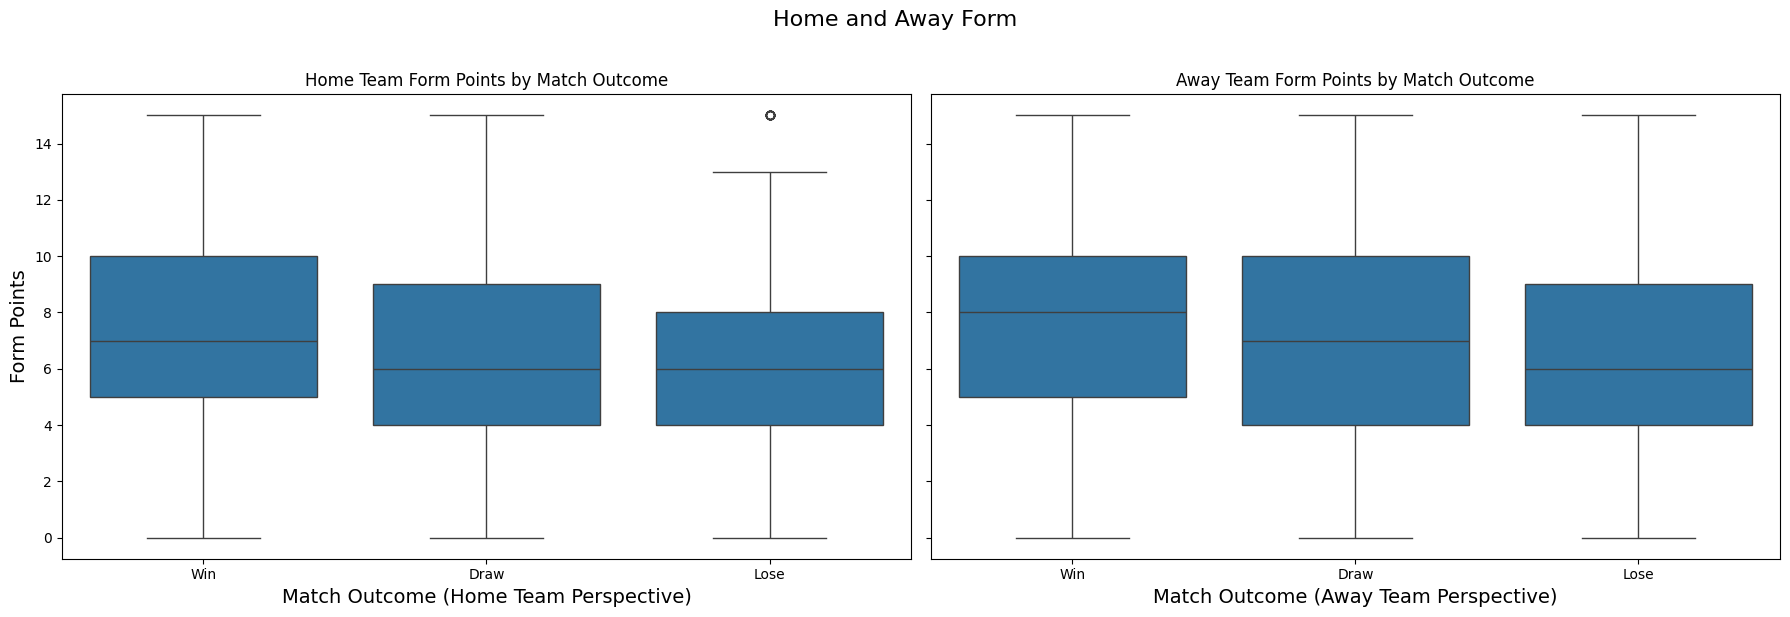

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.boxplot(x='FTR', y='HomeFormPoints', data=df, ax=ax[0], order=['H', 'D', 'A'])
ax[0].set_title('Home Team Form Points by Match Outcome')
ax[0].set_xlabel('Match Outcome (Home Team Perspective)', fontsize=14)
ax[0].set_ylabel('Form Points', fontsize=14)
ax[0].set_xticklabels(['Win', 'Draw', 'Lose'])

sns.boxplot(x='FTR', y='AwayFormPoints', data=df, ax=ax[1], order=['A', 'D', 'H'])
ax[1].set_title('Away Team Form Points by Match Outcome')
ax[1].set_xlabel('Match Outcome (Away Team Perspective)', fontsize=14)
ax[1].set_xticklabels(['Win', 'Draw', 'Lose'])

fig.suptitle('Home and Away Form', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

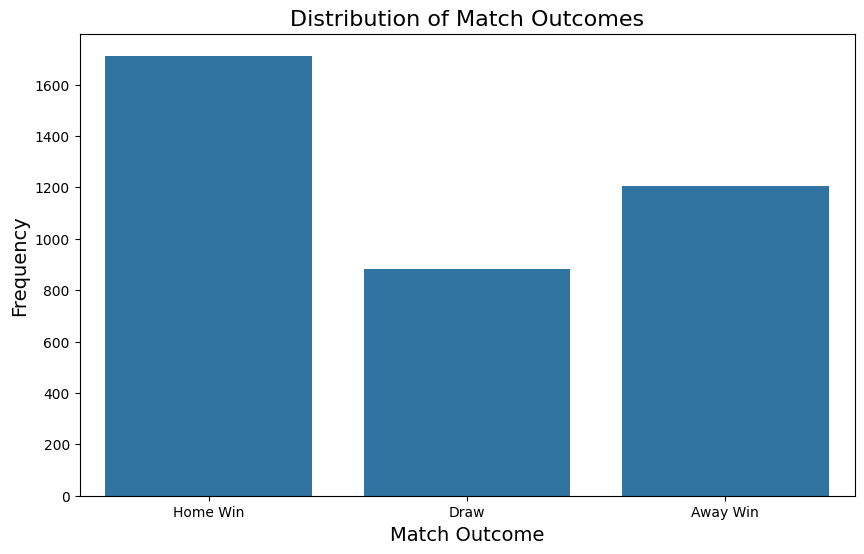

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FTR', data=data, order=['H', 'D', 'A'])
plt.title('Distribution of Match Outcomes', fontsize=16)
plt.xlabel('Match Outcome', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['Home Win', 'Draw', 'Away Win'])
plt.show()

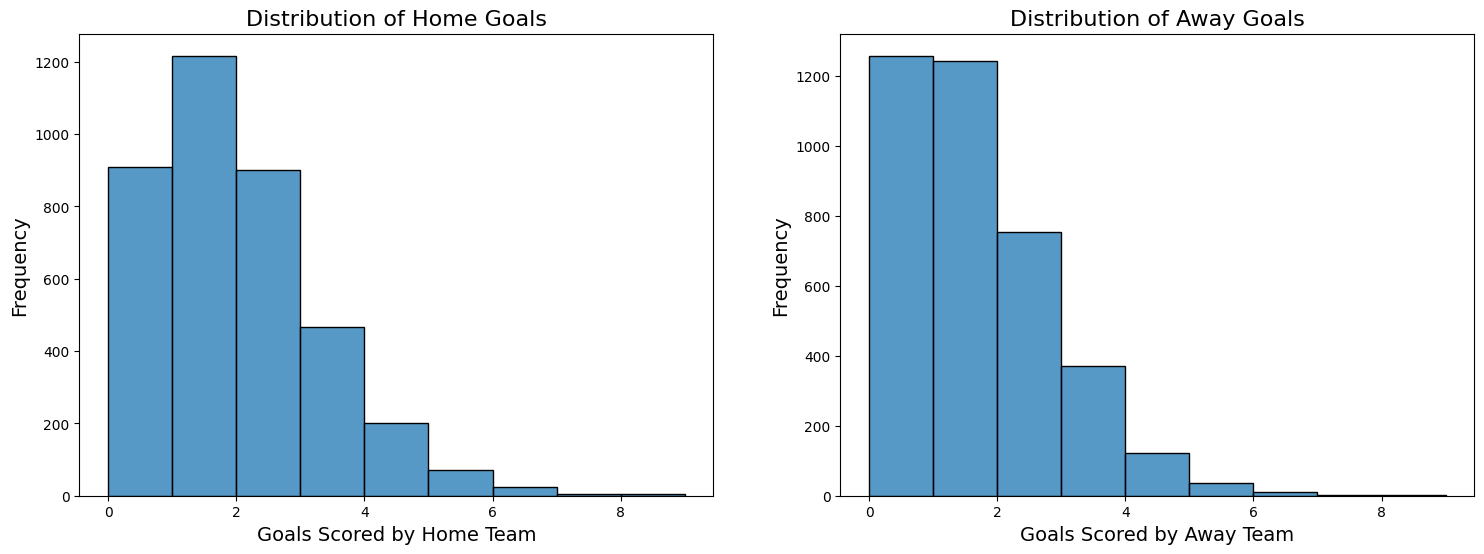

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data['FTHG'], bins=range(0, data['FTHG'].max()+1), kde=False, ax=ax[0])
ax[0].set_title('Distribution of Home Goals', fontsize=16)
ax[0].set_xlabel('Goals Scored by Home Team', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)

sns.histplot(data['FTAG'], bins=range(0, data['FTAG'].max()+1), kde=False, ax=ax[1])
ax[1].set_title('Distribution of Away Goals', fontsize=16)
ax[1].set_xlabel('Goals Scored by Away Team', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.show()

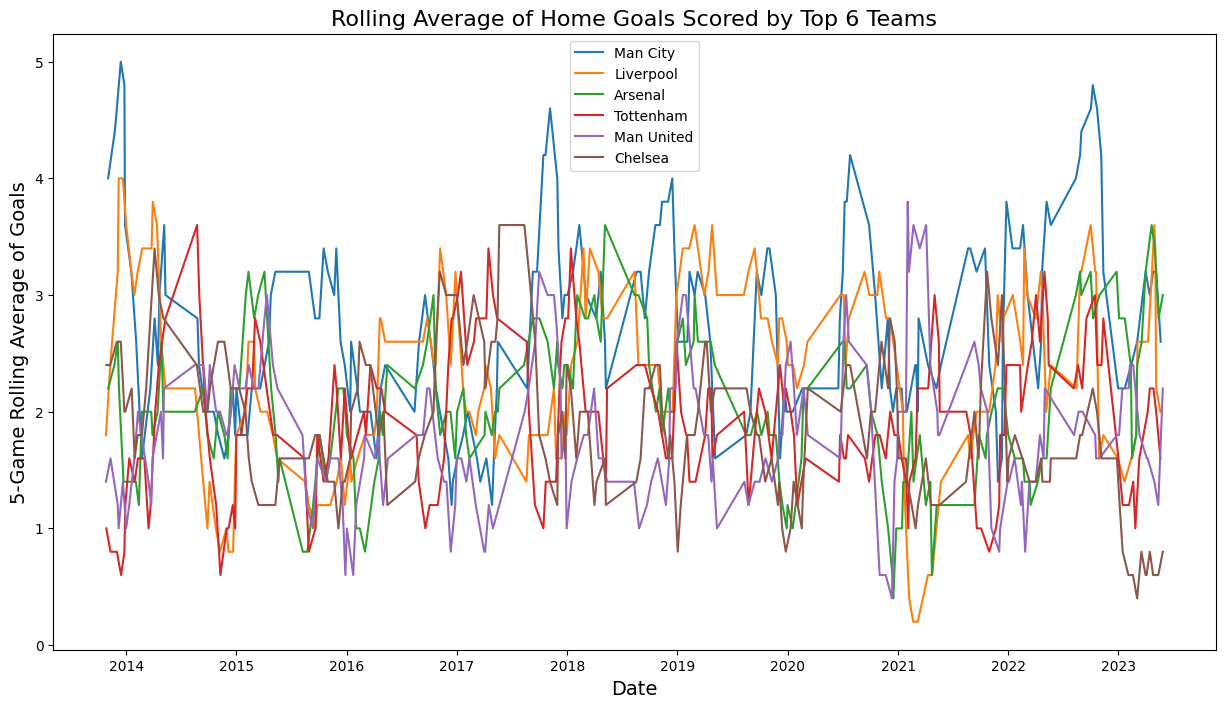

In [19]:
top_teams = data[data['FTR'] == 'H']['HomeTeam'].value_counts().head(6).index.tolist()

top_teams_home_data = data[data['HomeTeam'].isin(top_teams)]

plt.figure(figsize=(15, 8))
for team in top_teams:
    team_data = top_teams_home_data[top_teams_home_data['HomeTeam'] == team].copy()
    team_data['Date'] = pd.to_datetime(team_data['Date'])
    team_data = team_data.sort_values('Date')
    plt.plot(team_data['Date'], team_data['FTHG'].rolling(window=5).mean(), label=team)

plt.title('Rolling Average of Home Goals Scored by Top 6 Teams', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('5-Game Rolling Average of Goals', fontsize=14)
plt.legend()
plt.show()




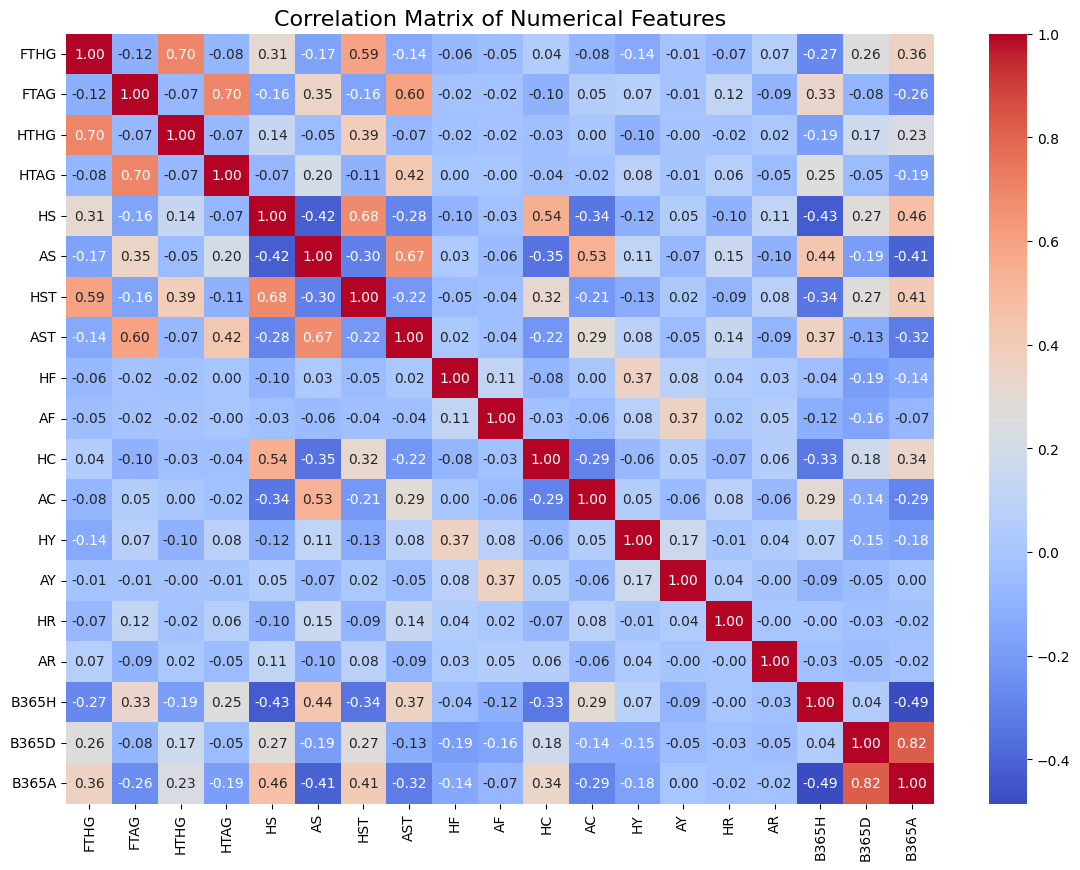

In [20]:
numerical_features = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']
correlation_matrix = data[numerical_features].corr()


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()


In [21]:
result_encoding = {'H': 1, 'D': 0, 'A': -1}
df_encoded = df.copy()
df_encoded['FTR_encoded'] = df['FTR'].map(result_encoding)

numeric_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_features = [feat for feat in numeric_features if feat not in ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'B365H', 'B365A', 'B365D']]

correlation_matrix = df_encoded[numeric_features].corr()

correlation_with_outcome = correlation_matrix['FTR_encoded'].sort_values(key=abs, ascending=False)

correlation_with_outcome


FTR_encoded             1.000000
HST                     0.423519
AST                    -0.421052
HomeTeamRating          0.297371
AwayTeamRating         -0.281988
AS                     -0.278642
HS                      0.248808
HomeGoalsScored_10      0.227630
AwayGoalsScored_10     -0.210429
AwayFormPoints         -0.195156
HomeFormPoints          0.179318
AwayGoalsConceded_10    0.159394
HomeGoalsConceded_10   -0.150553
HR                     -0.121536
AR                      0.105582
HY                     -0.097942
HC                      0.065078
AC                     -0.050705
HF                     -0.016528
AF                      0.010972
AY                      0.003177
Name: FTR_encoded, dtype: float64

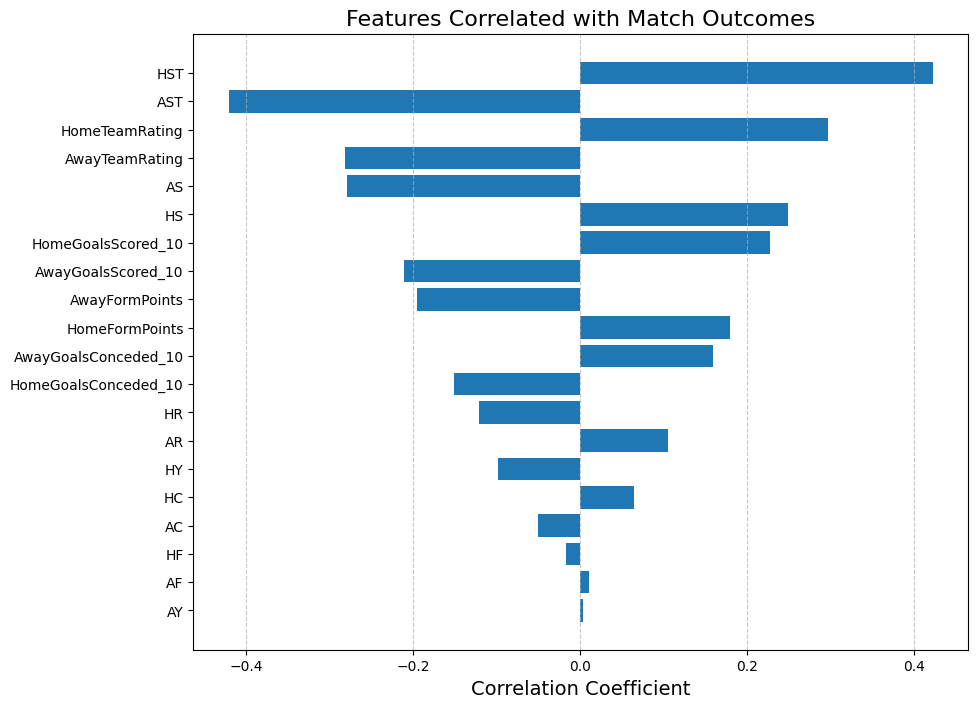

In [22]:
correlation = correlation_with_outcome.drop('FTR_encoded')

fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(correlation.index, correlation.values)

ax.set_xlabel('Correlation Coefficient', fontsize=14)
ax.set_title('Features Correlated with Match Outcomes', fontsize=16)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().invert_yaxis()

plt.show()


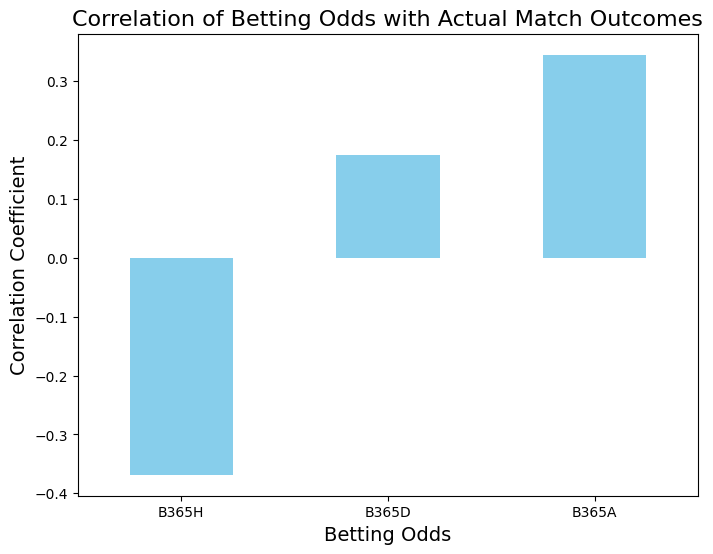

In [23]:
data['NumericFTR'] = data['FTR'].map({'H': 1, 'D': 0, 'A': -1})

betting_odds_correlation = data[['NumericFTR', 'B365H', 'B365D', 'B365A']].corr()['NumericFTR'].drop('NumericFTR')

plt.figure(figsize=(8, 6))
betting_odds_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of Betting Odds with Actual Match Outcomes', fontsize=16)
plt.xlabel('Betting Odds', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=0)
plt.show()


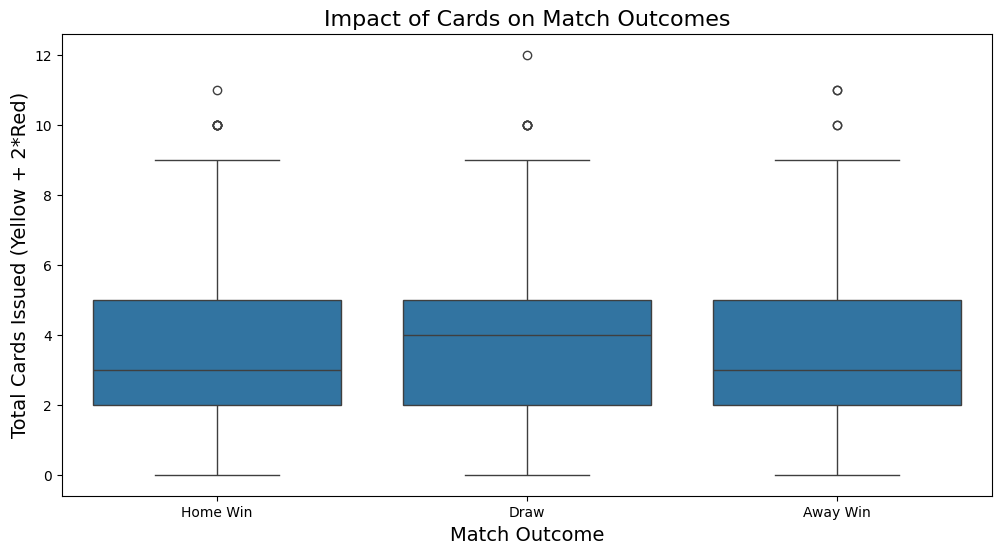

In [24]:
data['TotalCards'] = data['HY'] + data['AY'] + (data['HR'] * 2) + (data['AR'] * 2)

plt.figure(figsize=(12, 6))
sns.boxplot(x='FTR', y='TotalCards', data=data, order=['H', 'D', 'A'])
plt.title('Impact of Cards on Match Outcomes', fontsize=16)
plt.xlabel('Match Outcome', fontsize=14)
plt.ylabel('Total Cards Issued (Yellow + 2*Red)', fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=['Home Win', 'Draw', 'Away Win'])
plt.show()


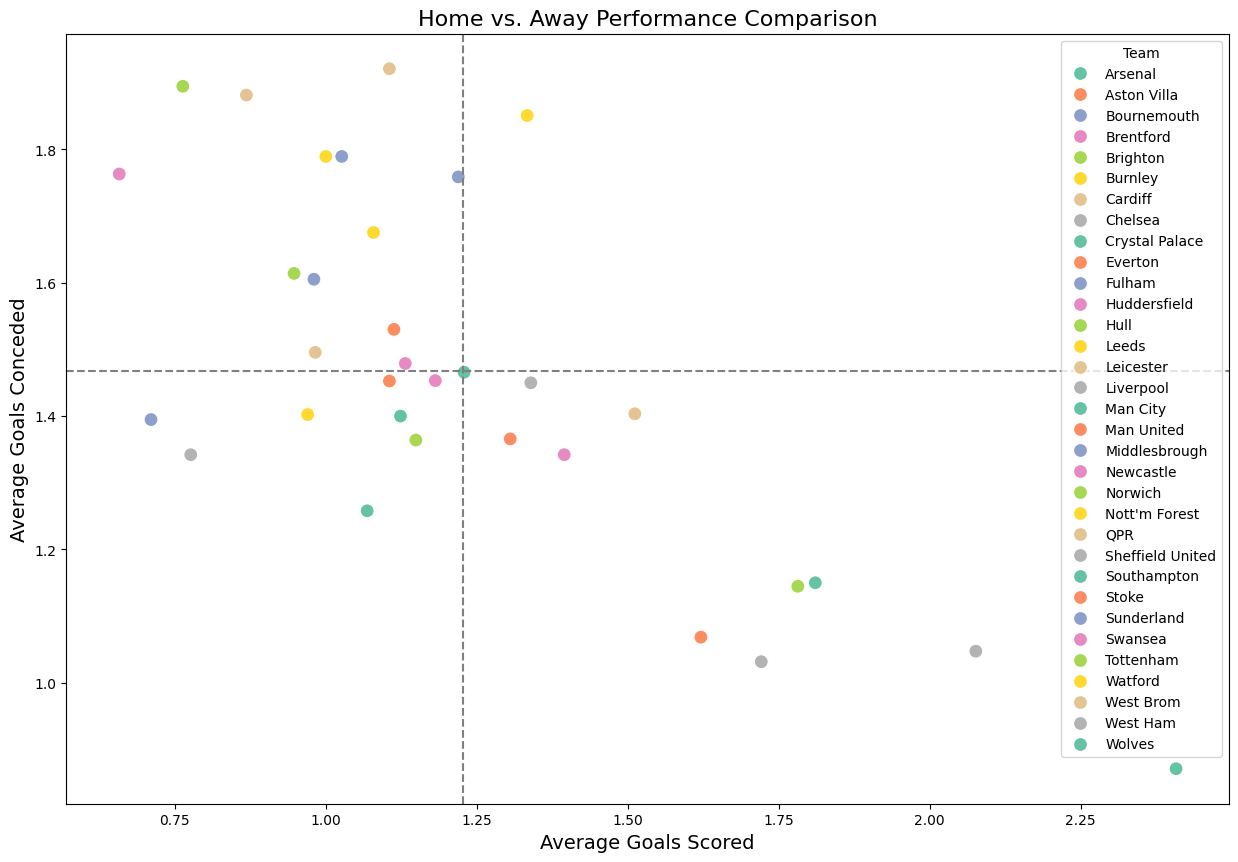

In [25]:
home_goals = data[['HomeTeam', 'FTHG', 'FTAG']].rename(columns={'HomeTeam': 'Team', 'FTHG': 'GoalsScored', 'FTAG': 'GoalsConceded'})
away_goals = data[['AwayTeam', 'FTAG', 'FTHG']].rename(columns={'AwayTeam': 'Team', 'FTAG': 'GoalsScored', 'FTHG': 'GoalsConceded'})
total_goals = pd.concat([home_goals, away_goals])

team_performance = total_goals.groupby('Team').mean().reset_index()

plt.figure(figsize=(15, 10))
sns.scatterplot(x='GoalsScored', y='GoalsConceded', hue='Team', data=team_performance, palette='Set2', s=100)
plt.title('Home vs. Away Performance Comparison', fontsize=16)
plt.xlabel('Average Goals Scored', fontsize=14)
plt.ylabel('Average Goals Conceded', fontsize=14)
plt.axhline(y=team_performance['GoalsConceded'].mean(), color='grey', linestyle='--')
plt.axvline(x=team_performance['GoalsScored'].mean(), color='grey', linestyle='--')
plt.show()

In [26]:
avg_odds_by_result_corrected = df.groupby('FTR')[['B365H', 'B365D', 'B365A']].mean()

avg_odds_by_result_corrected


,B365H,B365D,B365A
FTR,,,
A,4.099420,3.995191,3.084627
D,2.826950,3.918345,4.199331
H,2.201215,4.525140,6.481671


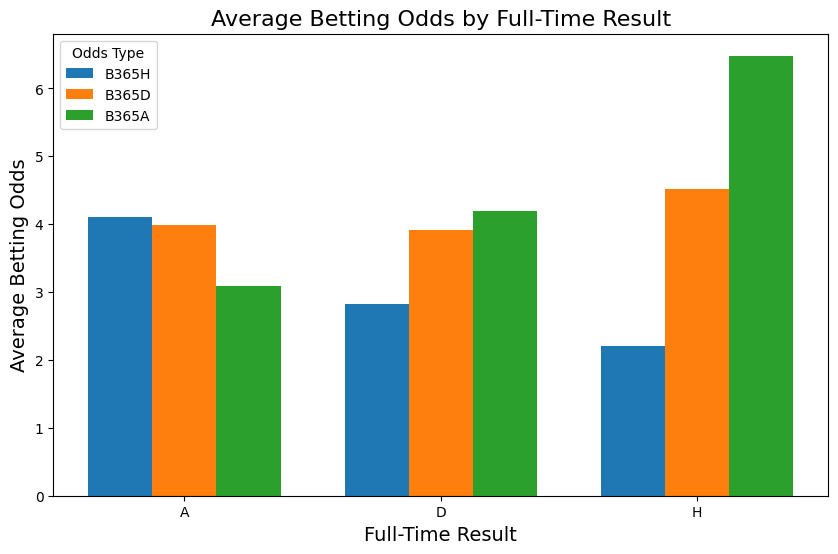

In [27]:
categories = avg_odds_by_result_corrected.index.tolist()
odds_types = ['B365H', 'B365D', 'B365A']
data = avg_odds_by_result_corrected.T

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = range(len(categories))

for i, odds_type in enumerate(odds_types):
    ax.bar([p + i * bar_width for p in index], data.loc[odds_type], bar_width, label=odds_type)

ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(categories)

ax.set_xlabel('Full-Time Result', fontsize=14)
ax.set_ylabel('Average Betting Odds', fontsize=14)
ax.set_title('Average Betting Odds by Full-Time Result', fontsize=16)
ax.legend(odds_types, title='Odds Type')

plt.show()


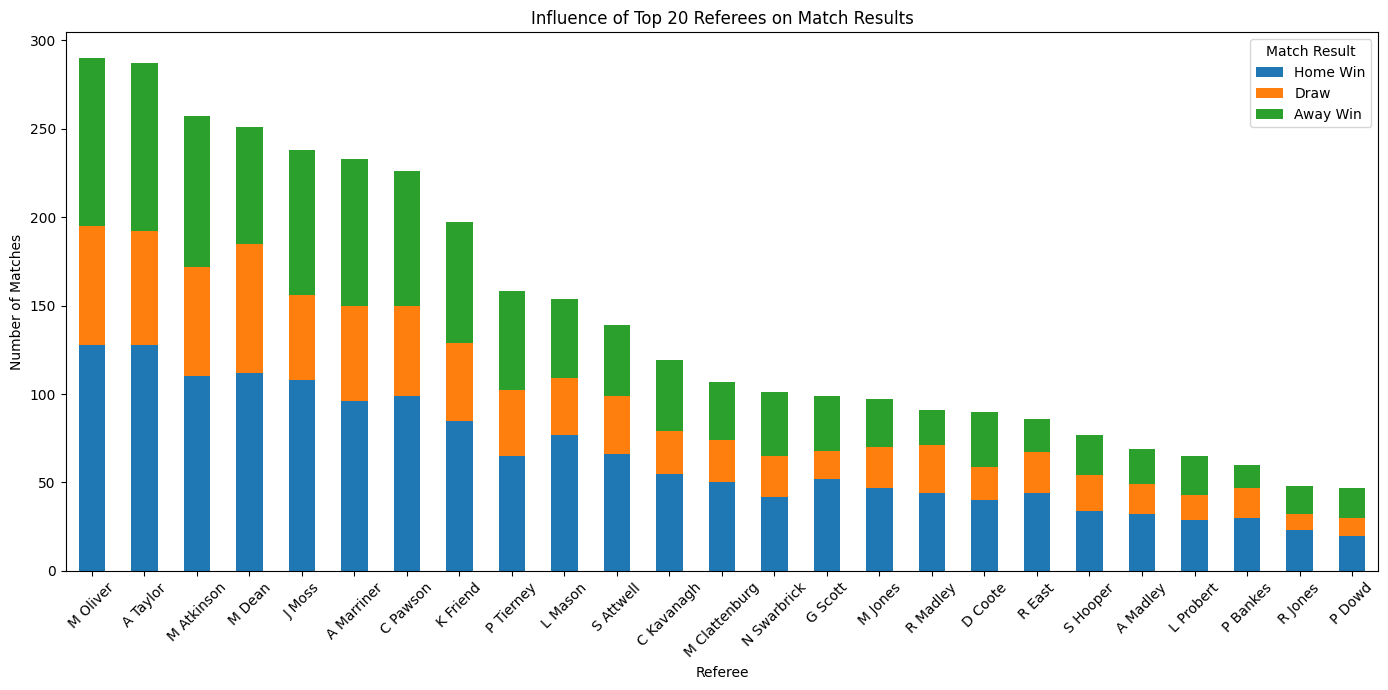

In [28]:
referee_results = df.groupby(['Referee', 'FTR']).size().unstack(fill_value=0)

top_referees = referee_results.sum(axis=1).sort_values(ascending=False).head(25).index

top_referee_results = referee_results.loc[top_referees]

top_referee_results[['H', 'D', 'A']].plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Influence of Top 20 Referees on Match Results')
plt.xlabel('Referee')
plt.ylabel('Number of Matches')
plt.legend(title='Match Result', labels=['Home Win', 'Draw', 'Away Win'])

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


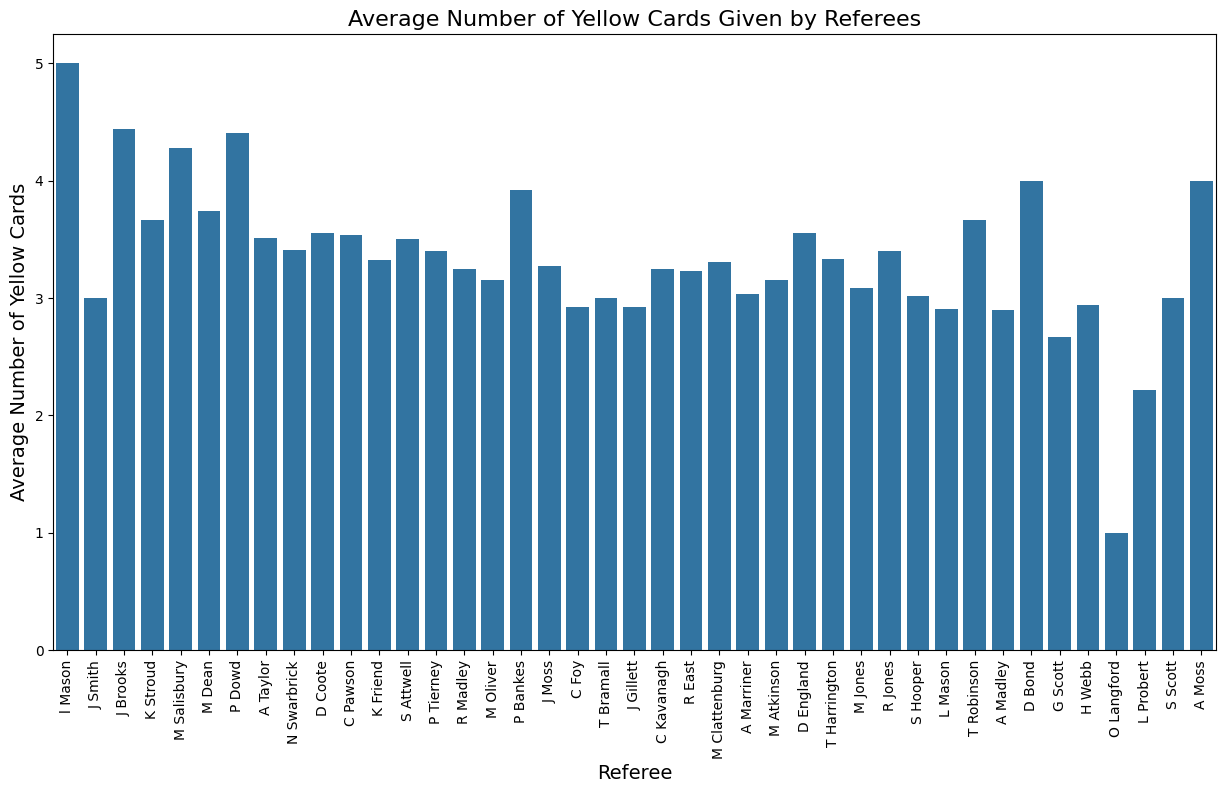

In [29]:
plt.figure(figsize=(15, 8))
referee_yellow_cards = df.groupby('Referee').agg({'HY': 'mean', 'AY': 'mean'}).sort_values(by='HY', ascending=False)
sns.barplot(x=referee_yellow_cards.index, y=referee_yellow_cards['HY'] + referee_yellow_cards['AY'])
plt.xticks(rotation=90)
plt.title('Average Number of Yellow Cards Given by Referees', fontsize=16)
plt.xlabel('Referee', fontsize=14)
plt.ylabel('Average Number of Yellow Cards', fontsize=14)
plt.show()

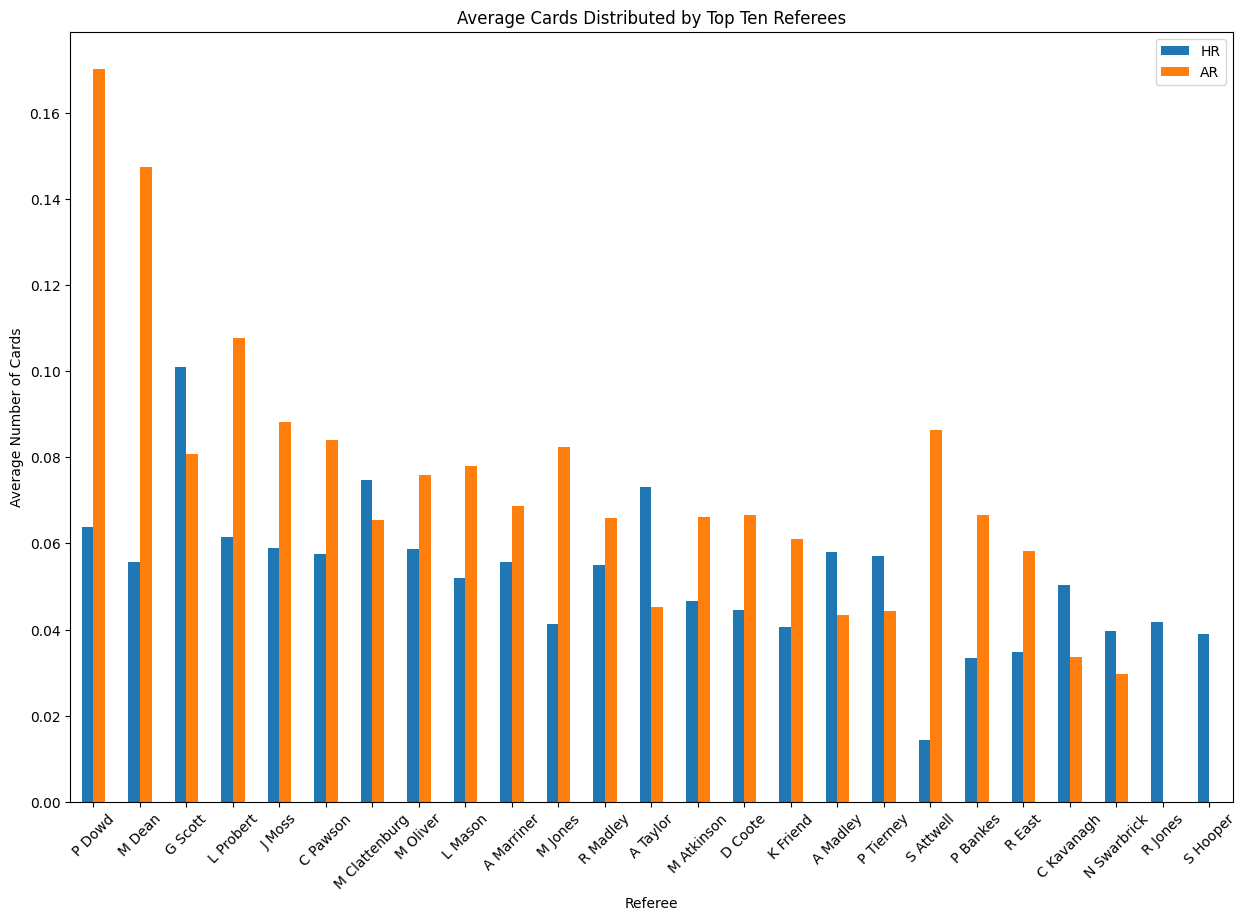

In [30]:
top_ten_refs_cards_corrected = df[df['Referee'].isin(top_referees)].groupby('Referee')[['HR', 'AR']].mean()

top_ten_refs_cards_sorted = top_ten_refs_cards_corrected.assign(Total=top_ten_refs_cards_corrected.sum(axis=1)).sort_values('Total', ascending=False).drop('Total', axis=1)

ax = top_ten_refs_cards_sorted.plot(kind='bar', stacked=False, figsize=(15, 10), title='Average Cards Distributed by Top Ten Referees')
ax.set_xlabel('Referee')
ax.set_ylabel('Average Number of Cards')
plt.xticks(rotation=45)
plt.show()



In [31]:
df['Home_SOT_Conversion'] = df.apply(lambda x: (x['FTHG'] / x['HST']) if x['HST'] > 0 else 0, axis=1)
df['Away_SOT_Conversion'] = df.apply(lambda x: (x['FTAG'] / x['AST']) if x['AST'] > 0 else 0, axis=1)

avg_home_conversion_pct = df['Home_SOT_Conversion'].mean() * 100
avg_away_conversion_pct = df['Away_SOT_Conversion'].mean() * 100

avg_home_conversion_pct, avg_away_conversion_pct



(32.4007323365489, 30.054914237808973)

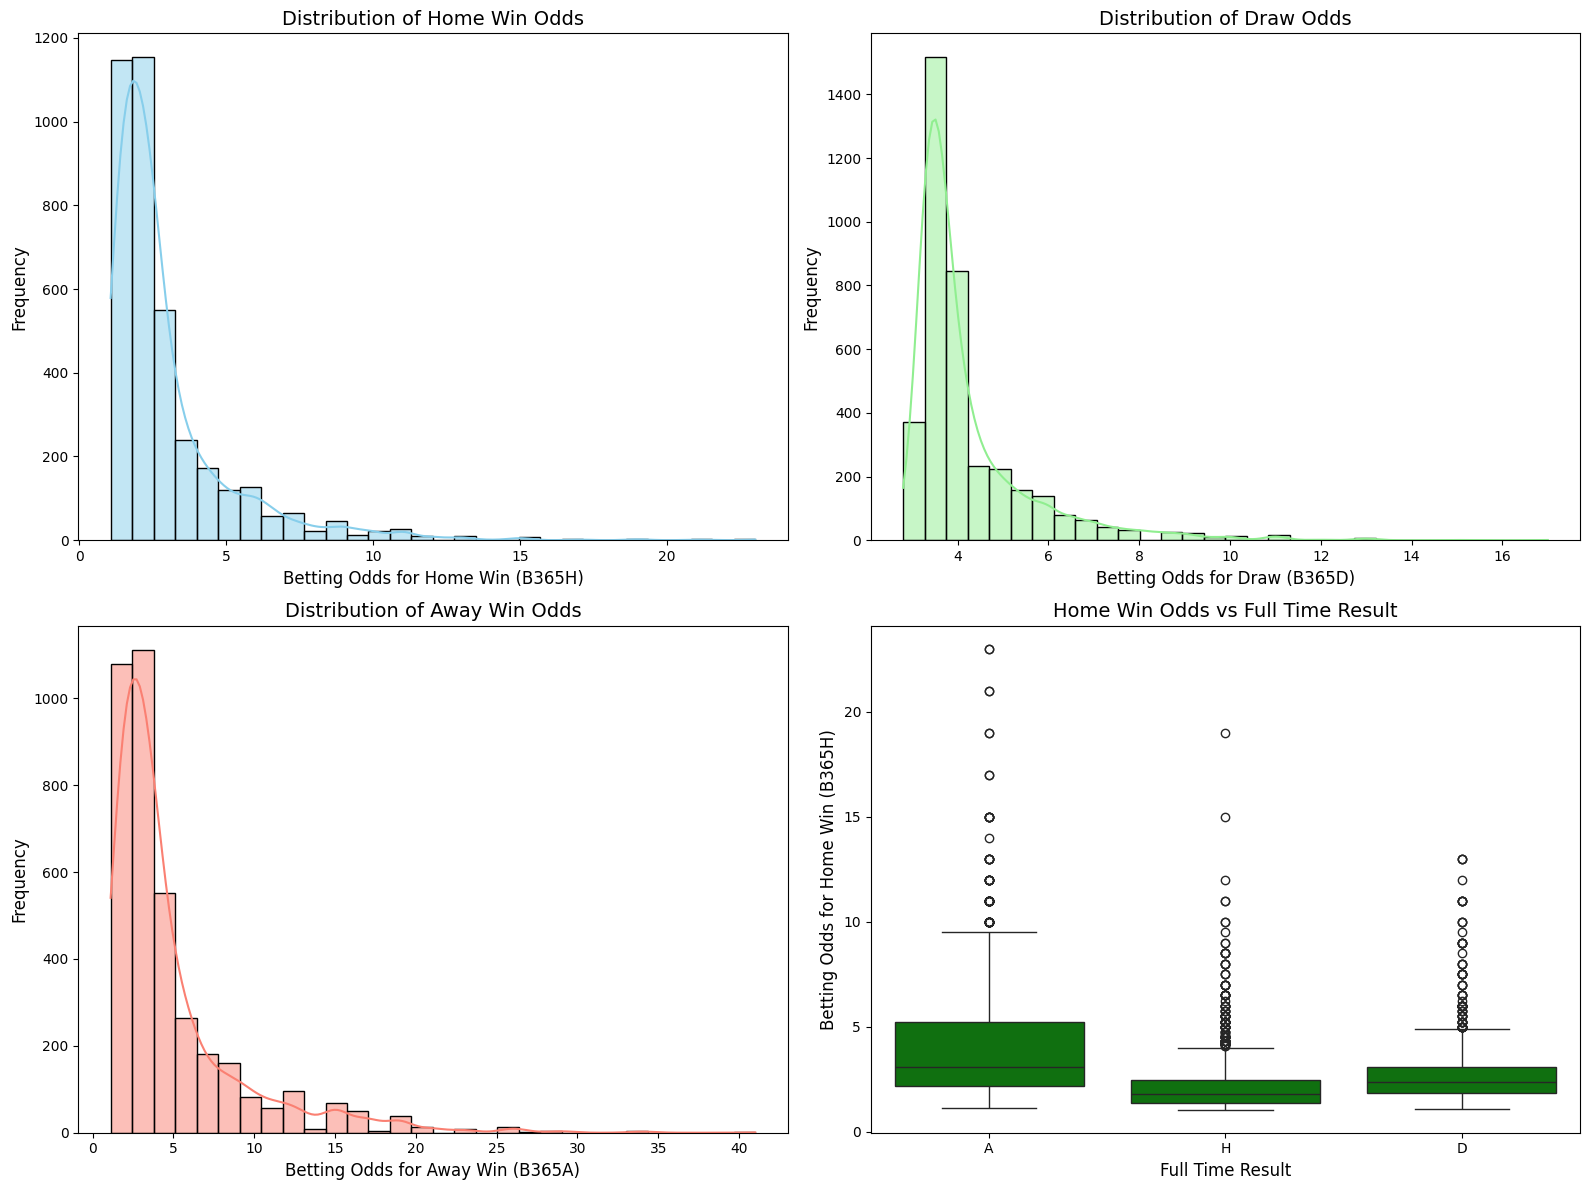

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.histplot(data=df, x='B365H', bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Home Win Odds', fontsize=14)
axes[0, 0].set_xlabel('Betting Odds for Home Win (B365H)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)

# Distribution of Draw Odds
sns.histplot(data=df, x='B365D', bins=30, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Draw Odds', fontsize=14)
axes[0, 1].set_xlabel('Betting Odds for Draw (B365D)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# Distribution of Away Win Odds
sns.histplot(data=df, x='B365A', bins=30, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Distribution of Away Win Odds', fontsize=14)
axes[1, 0].set_xlabel('Betting Odds for Away Win (B365A)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)

# Odds vs Full Time Result
sns.boxplot(data=df, x='FTR', y='B365H', ax=axes[1, 1], color='green')
axes[1, 1].set_title('Home Win Odds vs Full Time Result', fontsize=14)
axes[1, 1].set_xlabel('Full Time Result', fontsize=12)
axes[1, 1].set_ylabel('Betting Odds for Home Win (B365H)', fontsize=12)

plt.tight_layout()
plt.show()


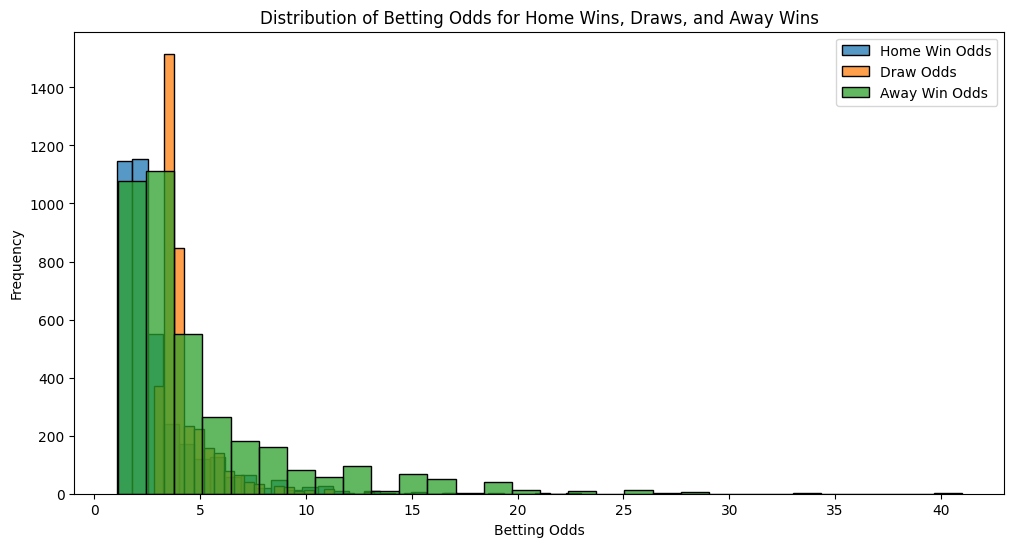

In [33]:
plt.figure(figsize=(12, 6))

sns.histplot(df['B365H'], bins=30, kde=False, label='Home Win Odds')
sns.histplot(df['B365D'], bins=30, kde=False, label='Draw Odds')
sns.histplot(df['B365A'], bins=30, kde=False, label='Away Win Odds')

plt.title('Distribution of Betting Odds for Home Wins, Draws, and Away Wins')
plt.xlabel('Betting Odds')
plt.ylabel('Frequency')
plt.legend()
plt.show()


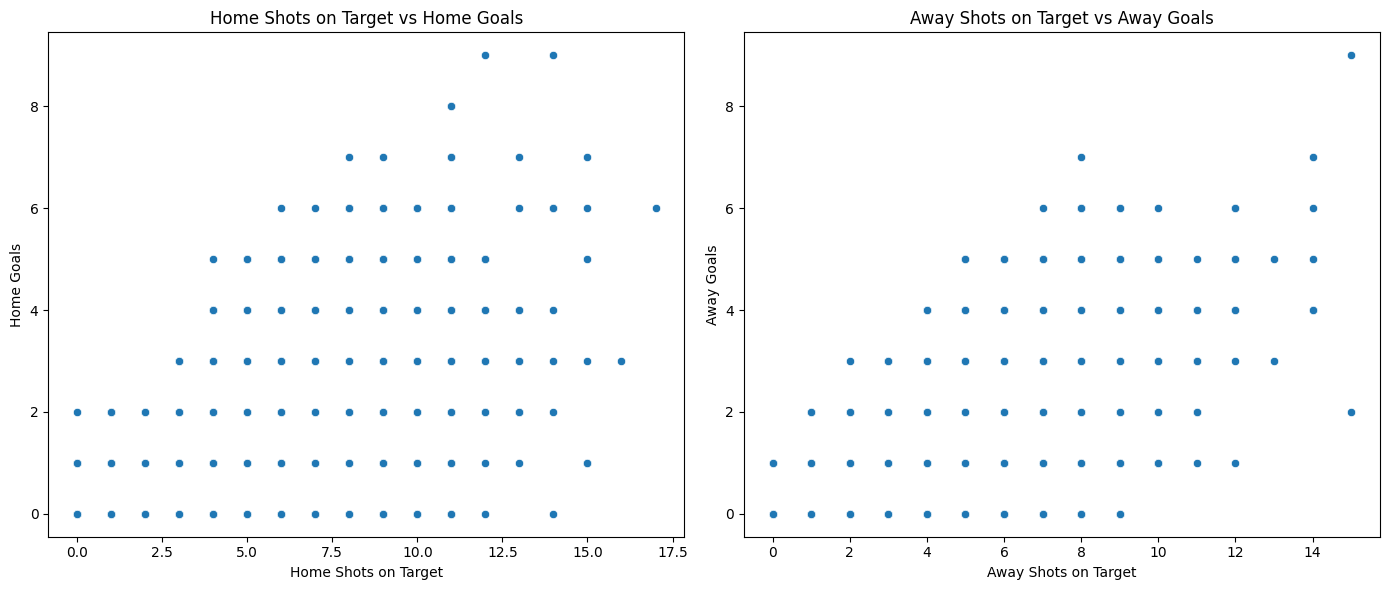

Correlation between Home Shots on Target and Home Goals: 0.592789225296915
Correlation between Away Shots on Target and Away Goals: 0.5950874613908206


In [34]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['HST'], y=df['FTHG'])
plt.title('Home Shots on Target vs Home Goals')
plt.xlabel('Home Shots on Target')
plt.ylabel('Home Goals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['AST'], y=df['FTAG'])
plt.title('Away Shots on Target vs Away Goals')
plt.xlabel('Away Shots on Target')
plt.ylabel('Away Goals')
plt.tight_layout()
plt.show()

home_corr = df['HST'].corr(df['FTHG'])
away_corr = df['AST'].corr(df['FTAG'])
print(f'Correlation between Home Shots on Target and Home Goals: {home_corr}')
print(f'Correlation between Away Shots on Target and Away Goals: {away_corr}')




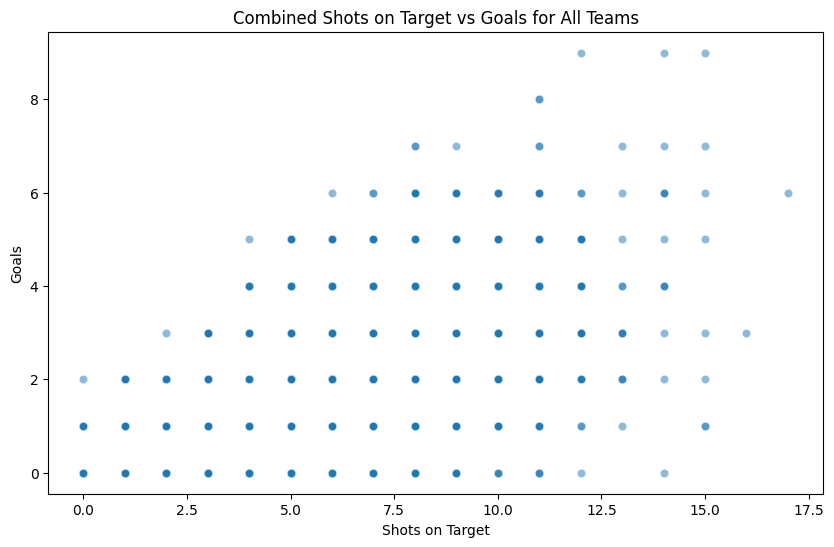

0.6013121028474866

In [35]:
combined_shots_on_target = pd.concat([df['HST'], df['AST']])
combined_goals = pd.concat([df['FTHG'], df['FTAG']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_shots_on_target, y=combined_goals, alpha=0.5)
plt.title('Combined Shots on Target vs Goals for All Teams')
plt.xlabel('Shots on Target')
plt.ylabel('Goals')

plt.show()

combined_correlation = combined_shots_on_target.corr(combined_goals)
combined_correlation


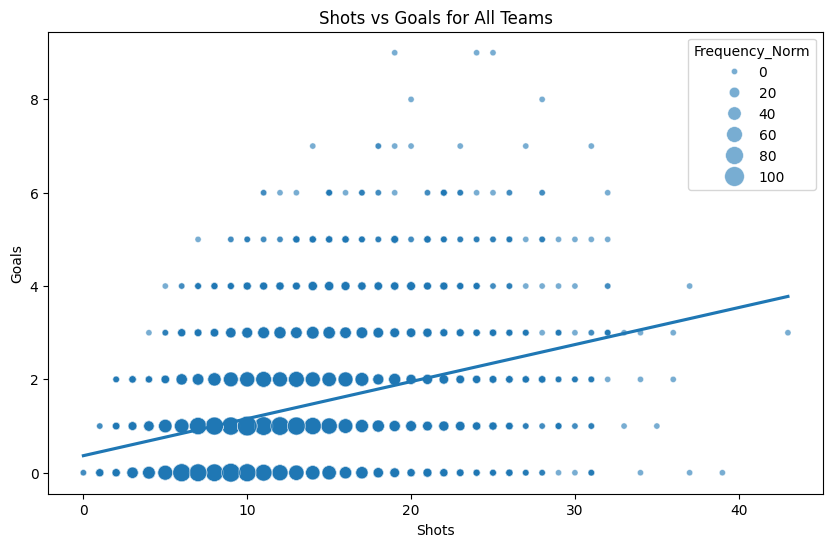

Correlation between all shots and goals: 0.3417870512211295


In [36]:
all_shots = pd.concat([df['HS'], df['AS']])
all_goals = pd.concat([df['FTHG'], df['FTAG']])

plot_df = pd.DataFrame({'Shots': all_shots, 'Goals': all_goals})

plot_df['Frequency'] = plot_df.groupby(['Shots', 'Goals'])['Shots'].transform('count')

plot_df['Frequency_Norm'] = (plot_df['Frequency'] - plot_df['Frequency'].min()) / (plot_df['Frequency'].max() - plot_df['Frequency'].min()) * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Shots', y='Goals', size='Frequency_Norm', alpha=0.6, legend=True, sizes=(20, 200))

sns.regplot(data=plot_df, x='Shots', y='Goals', scatter=False, ci=None)

plt.title('Shots vs Goals for All Teams')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.show()

correlation = plot_df['Shots'].corr(plot_df['Goals'])
print('Correlation between all shots and goals:', correlation)


In [37]:
home_shots_40_plus = df[df['HS'] >= 40][['Date', 'HomeTeam', 'HS', 'FTHG', 'FTAG', 'FTR']]
away_shots_40_plus = df[df['AS'] >= 40][['Date', 'AwayTeam', 'AS', 'FTHG', 'FTAG', 'FTR']]

home_shots_40_plus = home_shots_40_plus.rename(columns={'HomeTeam': 'Team', 'HS': 'Shots', 'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Result'})
away_shots_40_plus = away_shots_40_plus.rename(columns={'AwayTeam': 'Team', 'AS': 'Shots', 'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals', 'FTR': 'Result'})

shots_40_plus = pd.concat([home_shots_40_plus, away_shots_40_plus]).reset_index(drop=True)

shots_40_plus['Venue'] = ['Home' if 'HomeTeam' in row.index else 'Away' for _, row in shots_40_plus.iterrows()]

shots_40_plus['TeamGoals'] = shots_40_plus.apply(lambda row: row['HomeGoals'] if row['Venue'] == 'Home' else row['AwayGoals'], axis=1)
shots_40_plus['OpponentGoals'] = shots_40_plus.apply(lambda row: row['AwayGoals'] if row['Venue'] == 'Home' else row['HomeGoals'], axis=1)

shots_40_plus = shots_40_plus.drop(['HomeGoals', 'AwayGoals'], axis=1)

print(shots_40_plus)



        Date      Team  Shots Result Venue  TeamGoals  OpponentGoals
0 2015-03-21  Man City     43      H  Away          0              3


In [38]:
red_cards_df = df[['FTR', 'HR', 'AR']].copy()

red_cards_df['HomeRedCard'] = red_cards_df['HR'] > 0
red_cards_df['AwayRedCard'] = red_cards_df['AR'] > 0

matches_with_red = red_cards_df[(red_cards_df['HomeRedCard']) | (red_cards_df['AwayRedCard'])]

matches_with_red['HomeWinWithRed'] = (matches_with_red['FTR'] == 'H') & matches_with_red['HomeRedCard']
matches_with_red['AwayWinWithRed'] = (matches_with_red['FTR'] == 'A') & matches_with_red['AwayRedCard']
matches_with_red['HomeLoseWithRed'] = (matches_with_red['FTR'] == 'A') & matches_with_red['HomeRedCard']
matches_with_red['AwayLoseWithRed'] = (matches_with_red['FTR'] == 'H') & matches_with_red['AwayRedCard']

red_card_outcomes = {
    'Home Wins with Red Card': matches_with_red['HomeWinWithRed'].sum(),
    'Away Wins with Red Card': matches_with_red['AwayWinWithRed'].sum(),
    'Home Losses with Red Card': matches_with_red['HomeLoseWithRed'].sum(),
    'Away Losses with Red Card': matches_with_red['AwayLoseWithRed'].sum(),
}

red_card_outcomes


<ipython-input-38-2347fd51e818>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_red['HomeWinWithRed'] = (matches_with_red['FTR'] == 'H') & matches_with_red['HomeRedCard']
<ipython-input-38-2347fd51e818>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_red['AwayWinWithRed'] = (matches_with_red['FTR'] == 'A') & matches_with_red['AwayRedCard']
<ipython-input-38-2347fd51e818>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

{'Home Wins with Red Card': 47,
 'Away Wins with Red Card': 39,
 'Home Losses with Red Card': 106,
 'Away Losses with Red Card': 158}

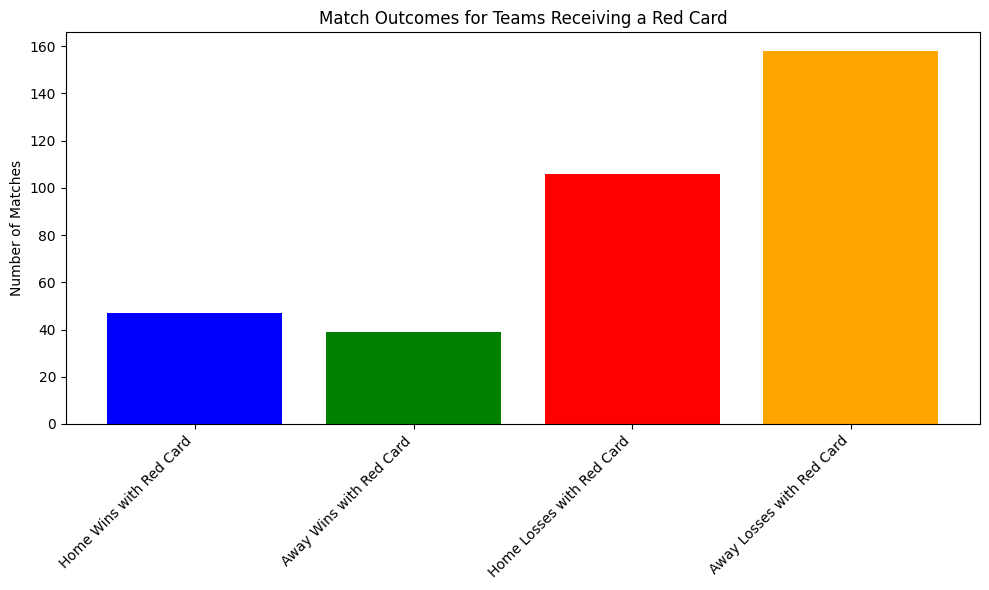

In [39]:
categories = list(red_card_outcomes.keys())
values = list(red_card_outcomes.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['blue', 'green', 'red', 'orange'])

plt.title('Match Outcomes for Teams Receiving a Red Card')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [40]:
total_matches_with_red_card_loss = red_card_outcomes['Home Losses with Red Card'] + red_card_outcomes['Away Losses with Red Card']
total_matches_with_red_card = matches_with_red.shape[0]

percentage_lost_with_red_card = (total_matches_with_red_card_loss / total_matches_with_red_card) * 100
percentage_lost_with_red_card


59.863945578231295

In [41]:
draws_with_red_card = matches_with_red[matches_with_red['FTR'] == 'D'].shape[0]

percentage_draws_with_red_card = (draws_with_red_card / total_matches_with_red_card) * 100
draws_with_red_card, percentage_draws_with_red_card


(101, 22.90249433106576)

In [42]:
wins_with_red_card = total_matches_with_red_card - draws_with_red_card - total_matches_with_red_card_loss

percentage_wins_with_red_card = (wins_with_red_card / total_matches_with_red_card) * 100
wins_with_red_card, percentage_wins_with_red_card


(76, 17.233560090702948)

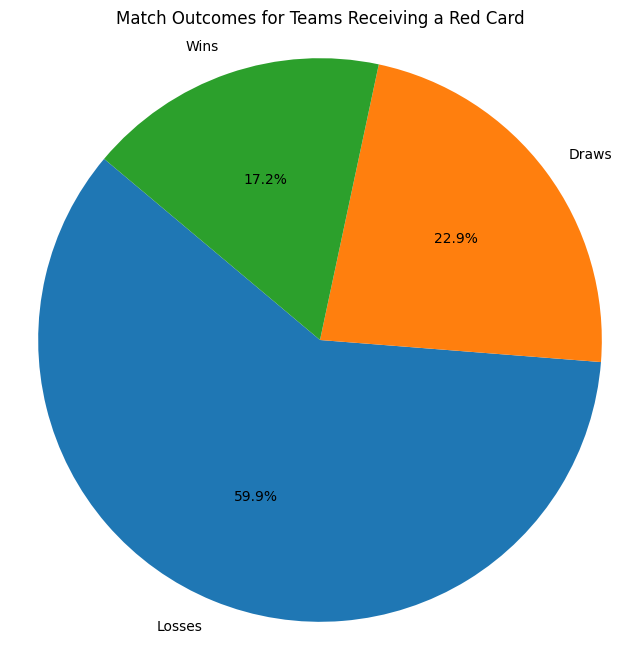

In [43]:
outcomes_labels = ['Losses', 'Draws', 'Wins']
outcomes_values = [total_matches_with_red_card_loss, draws_with_red_card, wins_with_red_card]


plt.figure(figsize=(8, 8))
plt.pie(outcomes_values, labels=outcomes_labels, autopct='%1.1f%%', startangle=140)
plt.title('Match Outcomes for Teams Receiving a Red Card')
plt.axis('equal')

plt.show()


In [44]:
matches_with_red_cards_both_teams = df[(df['HR'] > 0) & (df['AR'] > 0)].shape[0]
matches_with_red_cards_both_teams


14

In [45]:

matches_with_multiple_reds = df[(df['HR'] > 1) & (df['AR'] > 1)]

number_of_matches_with_multiple_reds = matches_with_multiple_reds.shape[0]
number_of_matches_with_multiple_reds


0

In [46]:
matches_with_multiple_reds_any_team = df[(df['HR'] > 1) | (df['AR'] > 1)]

number_of_matches_with_multiple_reds_any_team = matches_with_multiple_reds_any_team.shape[0]
number_of_matches_with_multiple_reds_any_team


17

In [47]:
wins_with_multiple_reds = matches_with_multiple_reds_any_team[
    ((matches_with_multiple_reds_any_team['HR'] > 1) & (matches_with_multiple_reds_any_team['FTR'] == 'H')) |
    ((matches_with_multiple_reds_any_team['AR'] > 1) & (matches_with_multiple_reds_any_team['FTR'] == 'A'))
]

wins_with_multiple_reds_count = wins_with_multiple_reds.shape[0]
wins_with_multiple_reds_count


0

In [48]:
draws_with_multiple_reds = matches_with_multiple_reds_any_team[matches_with_multiple_reds_any_team['FTR'] == 'D']

draws_with_multiple_reds_count = draws_with_multiple_reds.shape[0]
draws_with_multiple_reds_count


0

In [49]:
losses_with_multiple_reds_count = number_of_matches_with_multiple_reds_any_team
losses_with_multiple_reds_count


17

In [50]:
home_win_red_card_corr = df[['FTR', 'HR']].copy()
home_win_red_card_corr['HomeWin'] = home_win_red_card_corr['FTR'].apply(lambda x: 1 if x == 'H' else 0)
home_win_home_red_corr = home_win_red_card_corr[['HomeWin', 'HR']].corr().iloc[0, 1]

away_win_red_card_corr = df[['FTR', 'AR']].copy()
away_win_red_card_corr['AwayWin'] = away_win_red_card_corr['FTR'].apply(lambda x: 1 if x == 'A' else 0)
away_win_away_red_corr = away_win_red_card_corr[['AwayWin', 'AR']].corr().iloc[0, 1]

home_win_home_red_corr, away_win_away_red_corr


(-0.09933766463018442, -0.09939640093037454)

In [51]:
form_points_stats = df[['HomeFormPoints', 'AwayFormPoints']].describe()

format_dict = {'count': '{:.0f}', 'mean': '{:.2f}', 'std': '{:.2f}', 'min': '{:.2f}',
               '25%': '{:.2f}', '50%': '{:.2f}', '75%': '{:.2f}', 'max': '{:.2f}'}
styled_stats = form_points_stats.style.format(format_dict).set_caption("Summary Statistics for Home and Away Form Points")

match_outcomes = df.groupby('FTR')[['HomeFormPoints', 'AwayFormPoints']].mean()

styled_outcomes = match_outcomes.style.format('{:.2f}').set_caption("Average Form Points by Match Outcome")

display(styled_stats)
display(styled_outcomes)


,HomeFormPoints,AwayFormPoints
count,3800.000000,3800.000000
mean,6.745526,6.958158
std,3.544733,3.526545
min,0.000000,0.000000
25%,4.000000,4.000000
50%,7.000000,7.000000
75%,9.000000,10.000000
max,15.000000,15.000000


,HomeFormPoints,AwayFormPoints
FTR,,
A,5.98,7.86
D,6.46,7.05
H,7.43,6.27


<Figure size 1400x700 with 0 Axes>

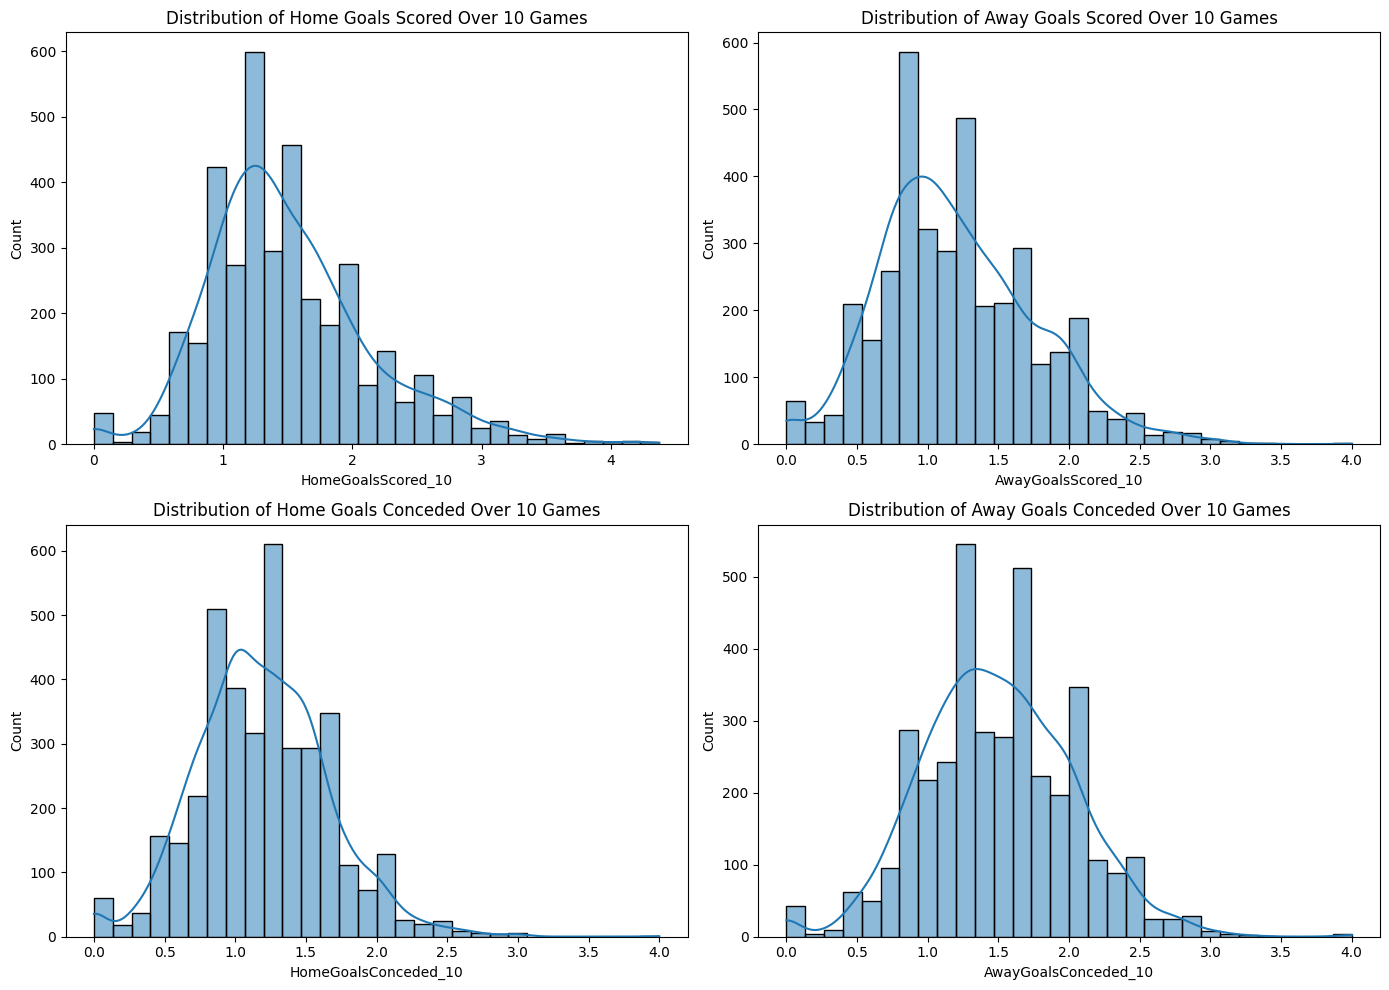

,HomeGoalsScored_10,AwayGoalsScored_10,HomeGoalsConceded_10,AwayGoalsConceded_10
count,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.506576,1.202612,1.187129,1.491957
std,0.637971,0.549375,0.467650,0.534285
min,0.000000,0.000000,0.000000,0.000000
25%,1.100000,0.800000,0.900000,1.100000
50%,1.400000,1.100000,1.200000,1.500000
75%,1.800000,1.500000,1.500000,1.857143
max,4.375000,4.000000,4.000000,4.000000


In [52]:

plt.figure(figsize=(14, 7))

goals_stats = df[['HomeGoalsScored_10', 'AwayGoalsScored_10', 'HomeGoalsConceded_10', 'AwayGoalsConceded_10']].describe()

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.histplot(df['HomeGoalsScored_10'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Home Goals Scored Over 10 Games')

sns.histplot(df['AwayGoalsScored_10'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Away Goals Scored Over 10 Games')

sns.histplot(df['HomeGoalsConceded_10'], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Home Goals Conceded Over 10 Games')

sns.histplot(df['AwayGoalsConceded_10'], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Away Goals Conceded Over 10 Games')

plt.tight_layout()
plt.show()

goals_stats



In [53]:
def determine_higher_rating_victory(row):
    if row['HomeTeamRating'] > row['AwayTeamRating'] and row['FTR'] == 'H':
        return 'Won'
    elif row['AwayTeamRating'] > row['HomeTeamRating'] and row['FTR'] == 'A':
        return 'Won'
    else:
        return 'Did Not Win'

df['HigherRatedTeamWon'] = df.apply(determine_higher_rating_victory, axis=1)

victory_counts = df['HigherRatedTeamWon'].value_counts()

victory_percentage = (victory_counts.get('Won', 0) / victory_counts.sum()) * 100

victory_percentage


49.60526315789473

In [54]:
def determine_higher_rating_outcome(row):
    if row['HomeTeamRating'] > row['AwayTeamRating']:
        if row['FTR'] == 'H':
            return 'Won'
        elif row['FTR'] == 'D':
            return 'Drew'
        else:
            return 'Lost'
    elif row['AwayTeamRating'] > row['HomeTeamRating']:
        if row['FTR'] == 'A':
            return 'Won'
        elif row['FTR'] == 'D':
            return 'Drew'
        else:
            return 'Lost'
    return None

df['HigherRatedTeamOutcome'] = df.apply(determine_higher_rating_outcome, axis=1)

df_filtered = df.dropna(subset=['HigherRatedTeamOutcome'])

outcome_counts = df_filtered['HigherRatedTeamOutcome'].value_counts()

outcome_df = outcome_counts.to_frame(name='Count')

outcome_df['Percentage'] = (outcome_df['Count'] / outcome_df['Count'].sum()) * 100

outcome_df.reset_index(inplace=True)
outcome_df.rename(columns={'index': 'Outcome'}, inplace=True)

outcome_df


,HigherRatedTeamOutcome,Count,Percentage
0,Won,1885,54.764672
1,Drew,779,22.632191
2,Lost,778,22.603138


In [55]:
def determine_equal_rating_outcome(row):
    if row['HomeTeamRating'] == row['AwayTeamRating']:
        return row['FTR']

df['EqualRatingOutcome'] = df.apply(determine_equal_rating_outcome, axis=1)

df_equal_ratings = df.dropna(subset=['EqualRatingOutcome'])

total_equal_games = df_equal_ratings.shape[0]

equal_rating_outcomes = df_equal_ratings['EqualRatingOutcome'].value_counts()

outcome_df = equal_rating_outcomes.to_frame(name='Count')

outcome_df['Percentage'] = (outcome_df['Count'] / outcome_df['Count'].sum()) * 100

outcome_df.reset_index(inplace=True)
outcome_df.rename(columns={'index': 'Outcome'}, inplace=True)

print(f"Total games where teams had equal ratings: {total_equal_games}")
outcome_df


Total games where teams had equal ratings: 358


,EqualRatingOutcome,Count,Percentage
0,H,152,42.458101
1,A,103,28.770950
2,D,103,28.770950


In [56]:
def categorize_outcome(row):
    if row['HomeTeamRating'] > row['AwayTeamRating']:
        location = 'Home'
        if row['FTR'] == 'H':
            result = 'Won'
        elif row['FTR'] == 'D':
            result = 'Drew'
        else:
            result = 'Lost'
    elif row['AwayTeamRating'] > row['HomeTeamRating']:
        location = 'Away'
        if row['FTR'] == 'A':
            result = 'Won'
        elif row['FTR'] == 'D':
            result = 'Drew'
        else:
            result = 'Lost'
    else:
        location = 'Equal'
        result = 'Drew'
    return location, result

df[['HigherRatedTeamLocation', 'HigherRatedTeamResult']] = df.apply(lambda row: categorize_outcome(row), axis=1, result_type='expand')

df_filtered = df[df['HigherRatedTeamLocation'] != 'Equal']

results_counts = df_filtered.groupby(['HigherRatedTeamLocation', 'HigherRatedTeamResult']).size()
results_summary_df = results_counts.unstack(fill_value=0)
results_summary_df['Total'] = results_summary_df.sum(axis=1)

for outcome in ['Won', 'Drew', 'Lost']:
    results_summary_df[outcome + ' %'] = (results_summary_df[outcome] / results_summary_df['Total']) * 100

results_summary_df = results_summary_df.reset_index()
results_summary_df = results_summary_df.sort_values(by='HigherRatedTeamLocation', ascending=False)
results_summary_df[['HigherRatedTeamLocation', 'Won', 'Won %', 'Drew', 'Drew %', 'Lost', 'Lost %', 'Total']]


HigherRatedTeamResult,HigherRatedTeamLocation,Won,Won %,Drew,Drew %,Lost,Lost %,Total
1,Home,1064,61.824521,375,21.789657,282,16.385822,1721
0,Away,821,47.704823,404,23.474724,496,28.820453,1721


In [57]:
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AwayTeamRating,NumericFTR,TotalCards,Home_SOT_Conversion,Away_SOT_Conversion,HigherRatedTeamWon,HigherRatedTeamOutcome,EqualRatingOutcome,HigherRatedTeamLocation,HigherRatedTeamResult
0,2013-08-17,Arsenal,Aston Villa,1,3,A,1,1,D,A Taylor,...,74.0,-1,11,0.250000,0.750000,Did Not Win,Lost,None,Home,Lost
1,2013-08-17,Liverpool,Stoke,1,0,H,1,0,H,M Atkinson,...,76.0,1,2,0.090909,0.000000,Won,Won,None,Home,Won
2,2013-08-17,Norwich,Everton,2,2,D,0,0,D,M Oliver,...,78.0,0,2,1.000000,0.333333,Did Not Win,Drew,None,Away,Drew
3,2013-08-17,Sunderland,Fulham,0,1,A,0,0,D,N Swarbrick,...,75.0,-1,3,0.000000,1.000000,Won,Won,None,Away,Won
4,2013-08-17,Swansea,Man United,1,4,A,0,2,A,P Dowd,...,82.0,-1,4,0.166667,0.571429,Won,Won,None,Away,Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,2023-05-28,Everton,Bournemouth,1,0,H,0,0,D,S Attwell,...,74.0,1,4,0.166667,0.000000,Won,Won,None,Home,Won
3796,2023-05-28,Leeds,Tottenham,1,4,A,0,1,A,A Taylor,...,82.0,-1,3,0.500000,0.571429,Won,Won,None,Away,Won
3797,2023-05-28,Leicester,West Ham,2,1,H,1,0,H,S Hooper,...,79.0,1,2,0.500000,0.333333,Did Not Win,None,H,Equal,Drew
3798,2023-05-28,Man United,Fulham,2,1,H,1,1,D,R Jones,...,76.0,1,3,0.250000,0.333333,Won,Won,None,Home,Won


# Creating training and testing data

In [58]:
data = pd.read_csv('PremData.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [59]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("Training samples:", len(train_data), "Testing samples:", len(test_data))


Training samples: 3040 Testing samples: 760


In [60]:

features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HomeFormPoints', 'AwayFormPoints', 'B365H', 'B365D', 'B365A', 'HomeGoalsScored_10', 'HomeGoalsConceded_10', 'AwayGoalsScored_10', 'AwayGoalsConceded_10', 'HomeTeamRating', 'AwayTeamRating']

features_train = train_data[features]
features_test = test_data[features]


In [61]:
bet_amount = 5

# SVM

In [62]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [63]:
target_train_svm = train_data['FTR'].map({'H': 1, 'D': 2, 'A': 3})
target_test_svm = test_data['FTR'].map({'H': 1, 'D': 2, 'A': 3})


In [64]:
svm_model = SVC(kernel='rbf')


In [65]:
sfs_svm = SequentialFeatureSelector(svm_model,
                                n_features_to_select=None,
                                direction='forward',
                                scoring='accuracy',
                                cv=5)

sfs_svm.fit(features_train_scaled, target_train_svm)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


SequentialFeatureSelector(estimator=SVC(), n_features_to_select=None,
                          scoring='accuracy')

In [66]:
features_train_sfs = sfs_svm.transform(features_train_scaled)
features_test_sfs = sfs_svm.transform(features_test_scaled)


In [67]:
selected_features_mask = sfs_svm.get_support()
selected_feature_names = features_train.columns[selected_features_mask].tolist()
print("Selected features:", selected_feature_names)


Selected features: ['AS', 'HST', 'AST', 'HC', 'AC', 'HR', 'B365H', 'B365D', 'B365A', 'HomeTeamRating', 'AwayTeamRating']


In [68]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(features_train_sfs, target_train_svm)
best_params_svm = grid_search.best_params_
best_params_svm

{'C': 1, 'gamma': 'scale'}

In [69]:
final_model = SVC(kernel='rbf', C=best_params_svm['C'], gamma=best_params_svm['gamma'])
final_model.fit(features_train_sfs, target_train_svm)

svm_predictions = final_model.predict(features_test_sfs)


In [70]:
accuracy = accuracy_score(target_test_svm, svm_predictions)
print(f"Test Set Accuracy: {accuracy}")

classification_rep = classification_report(target_test_svm, svm_predictions, target_names=['Home Win', 'Draw', 'Away Win'])
print("Classification Report:\n", classification_rep)

Test Set Accuracy: 0.6157894736842106
Classification Report:
               precision    recall  f1-score   support

    Home Win       0.63      0.83      0.71       334
        Draw       0.40      0.08      0.13       180
    Away Win       0.62      0.72      0.67       246

    accuracy                           0.62       760
   macro avg       0.55      0.54      0.50       760
weighted avg       0.57      0.62      0.56       760



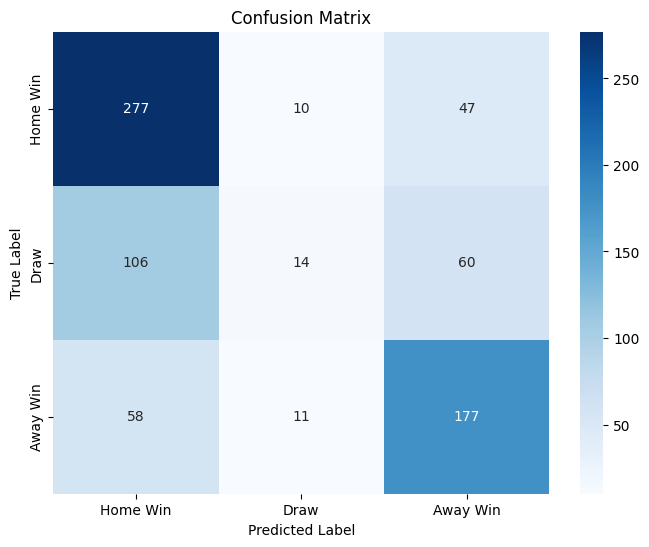

In [71]:
conf_matrix = confusion_matrix(target_test_svm, svm_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Home Win', 'Draw', 'Away Win'], yticklabels=['Home Win', 'Draw', 'Away Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Calculate Profit/Loss for SVM

In [72]:
prediction_mapping_svm = {1: 'H', 2: 'D', 3: 'A'}
total_profit_loss_svm = 0

bet_amount = 5
for i, (index, row) in enumerate(test_data.iterrows()):
    predicted_result_num = svm_predictions[i]
    predicted_result = prediction_mapping_svm[predicted_result_num]
    actual_result = row['FTR']

    odds = None
    if predicted_result == 'H':
        odds = row['B365H']
    elif predicted_result == 'D':
        odds = row['B365D']
    elif predicted_result == 'A':
        odds = row['B365A']

    if predicted_result == actual_result and odds is not None:
        profit_loss = (odds * bet_amount) - bet_amount
    else:
        profit_loss = -bet_amount

    total_profit_loss_svm += profit_loss

total_profit_loss_svm


1368.2500000000007

# KNN

In [73]:
scaler_knn = StandardScaler()

features_train_scaled_knn = scaler_knn.fit_transform(features_train)
features_test_scaled_knn = scaler_knn.transform(features_test)


In [74]:
target_train_knn = train_data['FTR'].map({'H': 1, 'D': 0, 'A': -1})
target_test_knn = test_data['FTR'].map({'H': 1, 'D': 0, 'A': -1})

knn = KNeighborsClassifier()


In [75]:
sfs_knn = SequentialFeatureSelector(knn,
                                n_features_to_select=None,
                                direction='forward',
                                scoring='accuracy',
                                cv=5)

sfs_knn.fit(features_train_scaled_knn, target_train_knn)

features_train_sfs = sfs_knn.transform(features_train_scaled_knn)
features_test_sfs = sfs_knn.transform(features_test_scaled_knn)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


In [76]:
selected_features_mask = sfs_knn.get_support()
selected_feature_names = features_train.columns[selected_features_mask].tolist()
print("Selected features:", selected_feature_names)


Selected features: ['AS', 'HST', 'AST', 'HF', 'HY', 'HR', 'AR', 'B365H', 'B365A', 'HomeGoalsScored_10', 'AwayGoalsScored_10']


In [77]:
param_grid = {
    'n_neighbors': range(10, 131, 20),
    'p': [1, 2, 3],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

grid_search_knn.fit(features_train_sfs, target_train_knn)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Parameters for KNN:", best_params_knn)
print("Best Cross-Validated Score for KNN:", best_score_knn)


Best Parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 130, 'p': 1, 'weights': 'distance'}
Best Cross-Validated Score for KNN: 0.605592105263158


In [78]:
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(features_train_sfs, target_train_knn)

y_pred_best_knn = knn_best.predict(features_test_sfs)

accuracy_knn = accuracy_score(target_test_knn, y_pred_best_knn)
print("KNN Model Accuracy:", accuracy_knn)
print("Classification Report for Best KNN Estimator:\n", classification_report(target_test_knn, y_pred_best_knn, target_names=['Home Win', 'Draw', 'Away Win']))


KNN Model Accuracy: 0.5960526315789474
Classification Report for Best KNN Estimator:
               precision    recall  f1-score   support

    Home Win       0.60      0.68      0.64       246
        Draw       0.43      0.03      0.06       180
    Away Win       0.60      0.84      0.70       334

    accuracy                           0.60       760
   macro avg       0.54      0.52      0.47       760
weighted avg       0.56      0.60      0.53       760



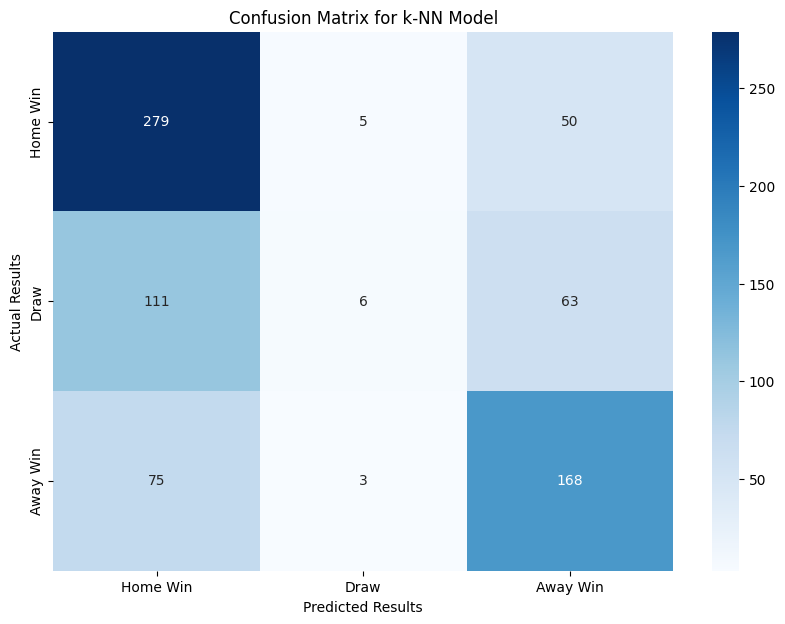

In [79]:
conf_matrix_knn = confusion_matrix(target_test_knn, y_pred_best_knn, labels=[1, 0, -1])

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Home Win', 'Draw', 'Away Win'], yticklabels=['Home Win', 'Draw', 'Away Win'])
plt.title('Confusion Matrix for k-NN Model')
plt.ylabel('Actual Results')
plt.xlabel('Predicted Results')
plt.show()


Calculate Profit/Loss for KNN

In [80]:
total_profit_loss_knn = 0
prediction_mapping_knn = {-1: 'A', 0: 'D', 1: 'H'}

for i, (index, row) in enumerate(test_data.iterrows()):
    predicted_result_num = y_pred_best_knn[i]
    predicted_result = prediction_mapping_knn.get(predicted_result_num, None)
    actual_result = row['FTR']

    odds = None
    if predicted_result == 'H':
        odds = row['B365H']
    elif predicted_result == 'D':
        odds = row['B365D']
    elif predicted_result == 'A':
        odds = row['B365A']

    if predicted_result == actual_result and odds is not None:
        profit_loss = (odds * bet_amount) - bet_amount
    else:
        profit_loss = -bet_amount

    total_profit_loss_knn += profit_loss

total_profit_loss_knn


921.9000000000001

# Random Forest

In [81]:
X_train = train_data[features]
y_train = train_data['FTR']
X_test = test_data[features]
y_test = test_data['FTR']

rf_clf = RandomForestClassifier(random_state=42)

In [82]:
sfs_rf = SequentialFeatureSelector(rf_clf,
                                n_features_to_select=None,
                                direction='forward',
                                scoring='accuracy',
                                cv=5)


sfs_rf.fit(X_train, y_train)

X_train_sfs = sfs_rf.transform(X_train)
X_test_sfs = sfs_rf.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


In [83]:
support_mask = sfs_rf.get_support()
selected_features = X_train.columns[support_mask].tolist()
print("Selected features:", selected_features)


Selected features: ['HS', 'AS', 'HST', 'AST', 'AC', 'HY', 'HR', 'AR', 'B365H', 'AwayGoalsScored_10', 'HomeTeamRating']


In [84]:
param_grid = {
    'n_estimators': [80, 100, 120],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_sfs, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 80}


In [85]:
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train_sfs, y_train)

y_pred_best_rf = rf_best.predict(X_test_sfs)

accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
classification_rep_rf = classification_report(y_test, y_pred_best_rf, labels=['H', 'D', 'A'])

print("Classification Report for Best Random Forest Estimator:\n", classification_rep_rf)
print("Accuracy:", accuracy_rf)



Classification Report for Best Random Forest Estimator:
               precision    recall  f1-score   support

           H       0.62      0.81      0.70       334
           D       0.26      0.06      0.09       180
           A       0.59      0.67      0.63       246

    accuracy                           0.59       760
   macro avg       0.49      0.51      0.47       760
weighted avg       0.52      0.59      0.53       760

Accuracy: 0.5894736842105263


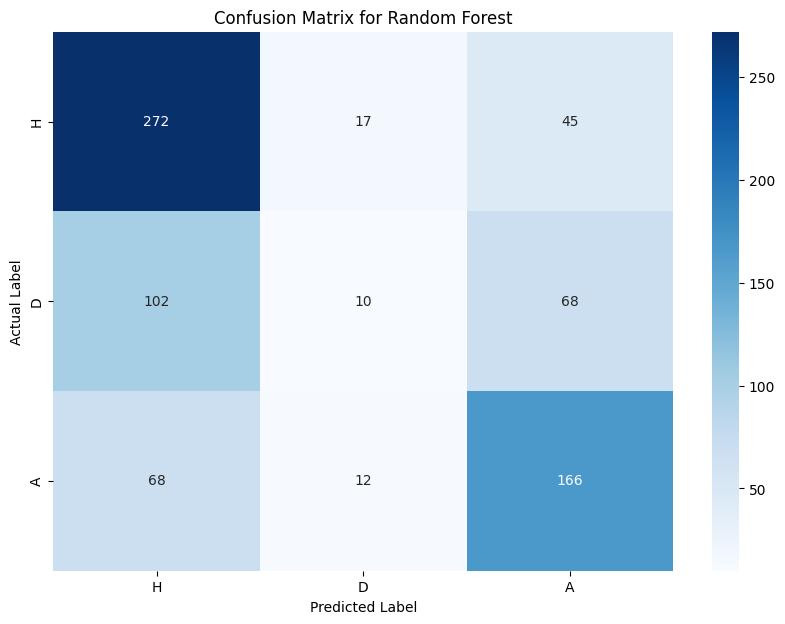

In [86]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_best_rf, labels=['H', 'D', 'A'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Calculate Profit/Loss for Random Forest

In [87]:
total_profit_loss_rf = 0

for i, (index, row) in enumerate(test_data.iterrows()):
    predicted_result = y_pred_best_rf[i]
    actual_result = row['FTR']

    odds = None
    if predicted_result == 'H':
        odds = row['B365H']
    elif predicted_result == 'D':
        odds = row['B365D']
    elif predicted_result == 'A':
        odds = row['B365A']

    if predicted_result == actual_result and odds is not None:
        profit_loss = (odds * bet_amount) - bet_amount
    else:
        profit_loss = -bet_amount

    total_profit_loss_rf += profit_loss

print("Total Profit or Loss for Random Forest:", total_profit_loss_rf)

Total Profit or Loss for Random Forest: 977.5999999999998


# Naive Bayes

In [88]:
X_train_nb = train_data[features]
X_test_nb = test_data[features]
target_train_knn = train_data['FTR'].map({'H': 1, 'D': 0, 'A': -1})
target_test_knn = test_data['FTR'].map({'H': 1, 'D': 0, 'A': -1})


In [89]:
gnb = GaussianNB()

sfs_gnb = SequentialFeatureSelector(gnb,
                                n_features_to_select=None,
                                direction='forward',
                                scoring='accuracy',
                                cv=5)

sfs_gnb.fit(X_train_nb, target_train_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


SequentialFeatureSelector(estimator=GaussianNB(), n_features_to_select=None,
                          scoring='accuracy')

In [90]:
feature_names = features

selected_features_mask = sfs_gnb.get_support()

selected_features = [feature for feature, selected in zip(feature_names, selected_features_mask) if selected]

print("Selected features by SequentialFeatureSelector with Naive Bayes:")
print(selected_features)


Selected features by SequentialFeatureSelector with Naive Bayes:
['HST', 'AST', 'HF', 'AF', 'AC', 'HY', 'HomeGoalsScored_10', 'AwayGoalsScored_10', 'AwayGoalsConceded_10', 'HomeTeamRating', 'AwayTeamRating']


In [91]:
X_train_sfs_nb = sfs_gnb.transform(X_train_nb)
X_test_sfs_nb = sfs_gnb.transform(X_test_nb)

gnb.fit(X_train_sfs_nb, target_train_knn)

GaussianNB()

In [92]:
y_pred_nb = gnb.predict(X_test_sfs_nb)

accuracy_nb = accuracy_score(target_test_knn, y_pred_nb)
classification_rep_nb = classification_report(target_test_knn, y_pred_nb, target_names=['Home Win', 'Draw', 'Away Win'])

print("Naive Bayes Model Accuracy:", accuracy_nb)
print("Naive Bayes Model Classification Report:\n", classification_rep_nb)


Naive Bayes Model Accuracy: 0.5776315789473684
Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

    Home Win       0.58      0.68      0.63       246
        Draw       0.34      0.18      0.23       180
    Away Win       0.63      0.72      0.67       334

    accuracy                           0.58       760
   macro avg       0.52      0.53      0.51       760
weighted avg       0.55      0.58      0.55       760



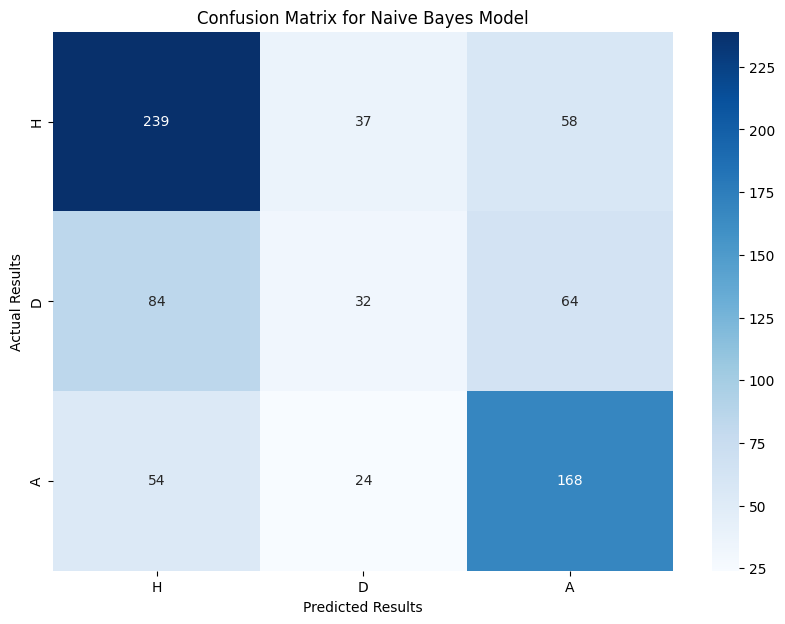

In [93]:
conf_matrix_nb = confusion_matrix(target_test_knn, y_pred_nb, labels=[1, 0, -1])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=['H', 'D', 'A'], yticklabels=['H', 'D', 'A'])
plt.title('Confusion Matrix for Naive Bayes Model')
plt.ylabel('Actual Results')
plt.xlabel('Predicted Results')
plt.show()


Calculate Profit/Loss for Naive Bayes

In [94]:
total_profit_loss_nb = 0

prediction_mapping_corrected = {-1: 'A', 0: 'D', 1: 'H'}

for i, (index, row) in enumerate(test_data.iterrows()):
    predicted_result_num = y_pred_nb[i]
    predicted_result = prediction_mapping_corrected.get(predicted_result_num, None)
    actual_result = row['FTR']

    odds = None
    if predicted_result == 'H':
        odds = row['B365H']
    elif predicted_result == 'D':
        odds = row['B365D']
    elif predicted_result == 'A':
        odds = row['B365A']

    if predicted_result == actual_result and odds is not None:
        profit_loss = (odds * bet_amount) - bet_amount
    else:
        profit_loss = -bet_amount

    total_profit_loss_nb += profit_loss

print("Total Profit or Loss for Naive Bayes:", total_profit_loss_nb)

Total Profit or Loss for Naive Bayes: 782.2499999999998


#Softmax Regression

In [125]:
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [127]:
sfs_sr = SequentialFeatureSelector(log_reg_model,
                                n_features_to_select='auto',
                                direction='forward',
                                scoring='accuracy',
                                cv=10)

sfs_sr.fit(features_train_scaled, train_data['FTR'])


SequentialFeatureSelector(cv=10,
                          estimator=LogisticRegression(max_iter=1000,
                                                       multi_class='multinomial'),
                          n_features_to_select='auto', scoring='accuracy')

In [129]:
features_train_sfs = sfs_sr.transform(features_train_scaled)
features_test_sfs = sfs_sr.transform(features_test_scaled)


In [130]:
feature_names = features

selected_features_mask = sfs_sr.get_support()

selected_features = [feature for feature, selected in zip(feature_names, selected_features_mask) if selected]

print("Selected features by SequentialFeatureSelector with Softmax Regression:")
print(selected_features)

Selected features by SequentialFeatureSelector with Softmax Regression:
['HS', 'AS', 'HST', 'AST', 'HF', 'HC', 'AC', 'HR', 'AR', 'B365H', 'AwayGoalsScored_10']


In [131]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga', 'lbfgs'],
    'max_iter': [1000]
}

grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial'), param_grid, cv=5, scoring='accuracy')

grid_search.fit(features_train_sfs, train_data['FTR'])

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.01, 'max_iter': 1000, 'solver': 'saga'}


In [132]:
best_log_reg_model = LogisticRegression(multi_class='multinomial', **best_params)
best_log_reg_model.fit(features_train_sfs, train_data['FTR'])

sr_predictions = best_log_reg_model.predict(features_test_sfs)

best_accuracy = best_log_reg_model.score(features_test_sfs, test_data['FTR'])
print("Best Model Accuracy:", best_accuracy)

best_report = classification_report(test_data['FTR'], sr_predictions, target_names=['Home Win', 'Draw', 'Away Win'])
print("Best Model Classification Report:")
print(best_report)

Best Model Accuracy: 0.6236842105263158
Best Model Classification Report:
              precision    recall  f1-score   support

    Home Win       0.63      0.73      0.68       246
        Draw       0.38      0.04      0.08       180
    Away Win       0.63      0.86      0.73       334

    accuracy                           0.62       760
   macro avg       0.55      0.54      0.49       760
weighted avg       0.57      0.62      0.56       760



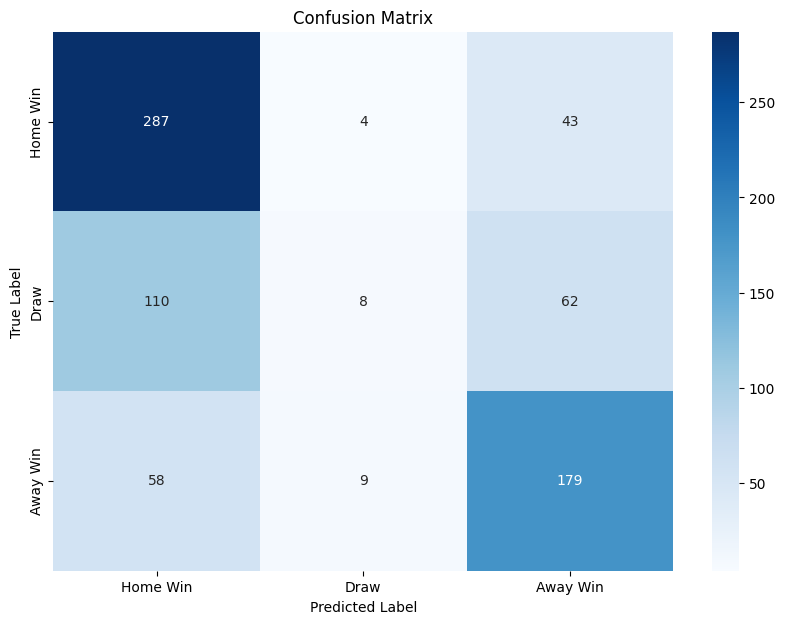

In [133]:
conf_matrix = confusion_matrix(test_data['FTR'], sr_predictions, labels=['H', 'D', 'A'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Home Win', 'Draw', 'Away Win'], yticklabels=['Home Win', 'Draw', 'Away Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Calculate Profit/Loss for Softmax Regression

In [154]:
total_profit_loss_sr = 0

for index in range(len(sr_predictions)):
    prediction = sr_predictions[index]
    actual = test_data['FTR'].iloc[index]

    if prediction == 'H':
        odds = test_data.iloc[index]['B365H']
    elif prediction == 'D':
        odds = test_data.iloc[index]['B365D']
    elif prediction == 'A':
        odds = test_data.iloc[index]['B365A']
    else:
        continue

    if prediction == actual:
        profit_loss = (odds * bet_amount) - bet_amount
    else:
        profit_loss = -bet_amount

    total_profit_loss_sr += profit_loss

print("Total Profit or Loss for Softmax Regression:", total_profit_loss_sr)

Total Profit or Loss for Softmax Regression: 1713.65


#Neural Networks

In [135]:
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)
target_train = train_data['FTR']
target_test = test_data['FTR']

In [136]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=1)


In [137]:
sfs_nn = SequentialFeatureSelector(nn_model,
                                n_features_to_select=None,
                                direction='forward',
                                scoring='accuracy',
                                cv=3)

sfs_nn.fit(features_train_scaled, target_train)

features_train_sfs = sfs_nn.transform(features_train_scaled)
features_test_sfs = sfs_nn.transform(features_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: 

In [138]:
feature_names = features

selected_features_mask = sfs_nn.get_support()

selected_features = [feature for feature, selected in zip(feature_names, selected_features_mask) if selected]

print("Selected features by SequentialFeatureSelector with Neural Network:")
print(selected_features)

Selected features by SequentialFeatureSelector with Neural Network:
['HS', 'HST', 'AST', 'AC', 'HR', 'AR', 'B365H', 'B365A', 'AwayGoalsScored_10', 'AwayGoalsConceded_10', 'HomeTeamRating']


In [139]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=300, random_state=1), param_grid, cv=3, scoring='accuracy')

grid_search.fit(features_train_sfs, target_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Best cross-validation score: 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [140]:
best_model = MLPClassifier(
    hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],
    activation=grid_search.best_params_['activation'],
    solver=grid_search.best_params_['solver'],
    alpha=grid_search.best_params_['alpha'],
    max_iter=300,
    random_state=1
)
best_model.fit(features_train_sfs, target_train)

nn_predictions = best_model.predict(features_test_sfs)
report_test = classification_report(target_test, nn_predictions)

print(report_test)

              precision    recall  f1-score   support

           A       0.60      0.69      0.64       246
           D       0.27      0.13      0.18       180
           H       0.65      0.76      0.70       334

    accuracy                           0.59       760
   macro avg       0.51      0.53      0.51       760
weighted avg       0.54      0.59      0.56       760



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Calculate Profit/Loss for Neural Networks

In [141]:
total_profit_loss_nn = 0
prediction_mapping_nn = {'H': 'H', 'D': 'D', 'A': 'A'}


for i, (index, row) in enumerate(test_data.iterrows()):
    predicted_result = prediction_mapping_nn[nn_predictions[i]]
    actual_result = row['FTR']

    odds = None
    if predicted_result == 'H':
        odds = row['B365H']
    elif predicted_result == 'D':
        odds = row['B365D']
    elif predicted_result == 'A':
        odds = row['B365A']

    if predicted_result == actual_result and odds is not None:
        profit_loss = (odds * bet_amount) - bet_amount
    else:
        profit_loss = -bet_amount

    total_profit_loss_nn += profit_loss

print("Total Profit or Loss for Neural Networks:", total_profit_loss_nn)

Total Profit or Loss for Neural Networks: 1291.65


#Betting Odds

In [156]:
total_profit_loss_rounded = {
    "Naive Bayes": round(total_profit_loss_nb, 2),
    "KNN": round(total_profit_loss_knn, 2),
    "Softmax Regression": round(total_profit_loss_sr, 2),
    "Random Forest": round(total_profit_loss_rf, 2),
    "SVM": round(total_profit_loss_svm, 2),
    'Neural Network': round(total_profit_loss_nn, 2)
}

df = pd.DataFrame(list(total_profit_loss_rounded.items()), columns=['Model', 'Profit/Loss'])

df_sorted = df.sort_values('Profit/Loss', ascending=False)

df_sorted


,Model,Profit/Loss
2,Softmax Regression,1713.65
4,SVM,1368.25
5,Neural Network,1291.65
3,Random Forest,977.60
1,KNN,921.90
0,Naive Bayes,782.25


In [143]:
report_svm = classification_report(target_test_svm, svm_predictions, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
report_knn = classification_report(target_test_knn, y_pred_best_knn, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
report_rf = classification_report(y_test, y_pred_best_rf, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
report_nb = classification_report(target_test_knn, y_pred_nb, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
report_sr = classification_report(test_data['FTR'], sr_predictions, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
report_nn = classification_report(target_test, nn_predictions, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)

def extract_class_metrics(report):
    metrics = {}
    metrics['Accuracy'] = report['accuracy']
    classes = ['Home Win', 'Draw', 'Away Win']
    for cls in classes:
        if cls in report:
            metrics[f'{cls} Precision'] = report[cls]['precision']
            metrics[f'{cls} Recall'] = report[cls]['recall']
            metrics[f'{cls} F1-Score'] = report[cls]['f1-score']
        else:
            metrics[f'{cls} Precision'] = None
            metrics[f'{cls} Recall'] = None
            metrics[f'{cls} F1-Score'] = None
    return metrics

data = []
models = ['SVM', 'KNN', 'Random Forest', 'Naive Bayes', 'Softmax Regression', 'Neural Networks']
reports = [report_svm, report_knn, report_rf, report_nb, report_sr, report_nn]

for model, report in zip(models, reports):
    metrics = extract_class_metrics(report)
    metrics['Model'] = model
    data.append(metrics)

results_df = pd.DataFrame(data)

cols = ['Model'] + [col for col in results_df.columns if col != 'Model']
results_df = results_df[cols]

results_df


,Model,Accuracy,Home Win Precision,Home Win Recall,Home Win F1-Score,Draw Precision,Draw Recall,Draw F1-Score,Away Win Precision,Away Win Recall,Away Win F1-Score
0,SVM,0.615789,0.628118,0.829341,0.714839,0.400000,0.077778,0.130233,0.623239,0.719512,0.667925
1,KNN,0.596053,0.597865,0.682927,0.637571,0.428571,0.033333,0.061856,0.600000,0.835329,0.698373
2,Random Forest,0.589474,0.594982,0.674797,0.632381,0.256410,0.055556,0.091324,0.615385,0.814371,0.701031
3,Naive Bayes,0.577632,0.579310,0.682927,0.626866,0.344086,0.177778,0.234432,0.633952,0.715569,0.672293
4,Softmax Regression,0.619737,0.624573,0.743902,0.679035,0.296296,0.044444,0.077295,0.636364,0.838323,0.723514
5,Neural Networks,0.588158,0.602837,0.691057,0.643939,0.266667,0.133333,0.177778,0.652062,0.757485,0.700831


#Basic Models

In [144]:
data = pd.read_csv('PremData.csv')
data['Date'] = pd.to_datetime(data['Date'])

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HomeFormPoints', 'AwayFormPoints',
            'B365H', 'B365D', 'B365A', 'HomeGoalsScored_10', 'HomeGoalsConceded_10', 'AwayGoalsScored_10', 'AwayGoalsConceded_10',
            'HomeTeamRating', 'AwayTeamRating']
target = 'FTR'

features_train = train_data[features]
features_test = test_data[features]
target_train = train_data[target].map({'H': 1, 'D': 2, 'A': 3})
target_test = test_data[target].map({'H': 1, 'D': 2, 'A': 3})

# Scale the features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

model_stats = {}

svm_model = SVC(kernel='rbf')
svm_model.fit(features_train_scaled, target_train)
predictions_svm = svm_model.predict(features_test_scaled)
model_stats['SVM'] = {
    "accuracy": accuracy_score(target_test, predictions_svm),
    "report": classification_report(target_test, predictions_svm, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
}

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(features_train_scaled, target_train)
predictions_knn = knn_model.predict(features_test_scaled)
model_stats['KNN'] = {
    "accuracy": accuracy_score(target_test, predictions_knn),
    "report": classification_report(target_test, predictions_knn, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
}

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(features_train, target_train)
predictions_rf = rf_model.predict(features_test)
model_stats['Random Forest'] = {
    "accuracy": accuracy_score(target_test, predictions_rf),
    "report": classification_report(target_test, predictions_rf, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
}

gnb = GaussianNB()
gnb.fit(features_train, target_train)
predictions_nb = gnb.predict(features_test)
model_stats['Naive Bayes'] = {
    "accuracy": accuracy_score(target_test, predictions_nb),
    "report": classification_report(target_test, predictions_nb, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
}

sr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
sr_model.fit(features_train_scaled, target_train)
predictions_sr = sr_model.predict(features_test_scaled)
model_stats['Softmax Regression'] = {
    "accuracy": accuracy_score(target_test, predictions_sr),
    "report": classification_report(target_test, predictions_sr, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
}

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)
nn_model.fit(features_train_scaled, target_train)
predictions_nn = nn_model.predict(features_test_scaled)
model_stats['Neural Network'] = {
    "accuracy": accuracy_score(target_test, predictions_nn),
    "report": classification_report(target_test, predictions_nn, target_names=['Home Win', 'Draw', 'Away Win'], output_dict=True)
}

for model, stats in model_stats.items():
    print(f"{model} Accuracy: {stats['accuracy']}")
    print(f"{model} Classification Report:")
    print(stats['report'])


SVM Accuracy: 0.6118421052631579
SVM Classification Report:
{'Home Win': {'precision': 0.6365740740740741, 'recall': 0.8233532934131736, 'f1-score': 0.7180156657963446, 'support': 334}, 'Draw': {'precision': 0.36538461538461536, 'recall': 0.10555555555555556, 'f1-score': 0.16379310344827586, 'support': 180}, 'Away Win': {'precision': 0.6195652173913043, 'recall': 0.6951219512195121, 'f1-score': 0.6551724137931033, 'support': 246}, 'accuracy': 0.6118421052631579, 'macro avg': {'precision': 0.5405079689499979, 'recall': 0.5413436000627471, 'f1-score': 0.5123270610125745, 'support': 760}, 'weighted avg': {'precision': 0.5668394934055689, 'recall': 0.6118421052631579, 'f1-score': 0.5664110589339106, 'support': 760}}
KNN Accuracy: 0.5631578947368421
KNN Classification Report:
{'Home Win': {'precision': 0.5990888382687927, 'recall': 0.7874251497005988, 'f1-score': 0.6804657179818888, 'support': 334}, 'Draw': {'precision': 0.3391304347826087, 'recall': 0.21666666666666667, 'f1-score': 0.26440

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [145]:
results = {
    "Model": ["SVM", "KNN", "Random Forest", "Naive Bayes", "Softmax Regression", "Neural Network"],
    "Accuracy": [0.6118, 0.5632, 0.5974, 0.5276, 0.6329, 0.5776],
    "Precision (Home Win)": [0.6366, 0.5991, 0.6077, 0.6564, 0.6716, 0.6722],
    "Recall (Home Win)": [0.8234, 0.7874, 0.8024, 0.5719, 0.8144, 0.7246],
    "F1-Score (Home Win)": [0.7180, 0.6805, 0.6916, 0.6112, 0.7361, 0.6974],
    "Precision (Draw)": [0.3654, 0.3391, 0.4000, 0.2881, 0.3898, 0.3356],
    "Recall (Draw)": [0.1056, 0.2167, 0.1333, 0.2833, 0.1278, 0.2778],
    "F1-Score (Draw)": [0.1638, 0.2644, 0.2000, 0.2857, 0.1925, 0.3040],
    "Precision (Away Win)": [0.6196, 0.6117, 0.6255, 0.5445, 0.6284, 0.5857],
    "Recall (Away Win)": [0.6951, 0.5122, 0.6585, 0.6463, 0.7561, 0.5976],
    "F1-Score (Away Win)": [0.6552, 0.5575, 0.6416, 0.5911, 0.6863, 0.5915]
}

results_df = pd.DataFrame(results)

results_df


,Model,Accuracy,Precision (Home Win),Recall (Home Win),F1-Score (Home Win),Precision (Draw),Recall (Draw),F1-Score (Draw),Precision (Away Win),Recall (Away Win),F1-Score (Away Win)
0,SVM,0.6118,0.6366,0.8234,0.7180,0.3654,0.1056,0.1638,0.6196,0.6951,0.6552
1,KNN,0.5632,0.5991,0.7874,0.6805,0.3391,0.2167,0.2644,0.6117,0.5122,0.5575
2,Random Forest,0.5974,0.6077,0.8024,0.6916,0.4000,0.1333,0.2000,0.6255,0.6585,0.6416
3,Naive Bayes,0.5276,0.6564,0.5719,0.6112,0.2881,0.2833,0.2857,0.5445,0.6463,0.5911
4,Multinomial Logistic Regression,0.6329,0.6716,0.8144,0.7361,0.3898,0.1278,0.1925,0.6284,0.7561,0.6863
5,Neural Network,0.5776,0.6722,0.7246,0.6974,0.3356,0.2778,0.3040,0.5857,0.5976,0.5915


#Table of Features Selected

In [146]:
feature_names = features

selected_features_svm = [feature for feature, selected in zip(feature_names, sfs_svm.get_support()) if selected]
selected_features_knn = [feature for feature, selected in zip(feature_names, sfs_knn.get_support()) if selected]
selected_features_rf = [feature for feature, selected in zip(feature_names, sfs_rf.get_support()) if selected]
selected_features_nb = [feature for feature, selected in zip(feature_names, sfs_gnb.get_support()) if selected]
selected_features_sr = [feature for feature, selected in zip(feature_names, sfs_sr.get_support()) if selected]
selected_features_nn = [feature for feature, selected in zip(feature_names, sfs_nn.get_support()) if selected]

data = {
    "Model": ["SVM", "KNN", "Random Forest", "Naive Bayes", "MSoftmax Regression", "Neural Network"],
    "Selected Features": [
        ", ".join(selected_features_svm),
        ", ".join(selected_features_knn),
        ", ".join(selected_features_rf),
        ", ".join(selected_features_nb),
        ", ".join(selected_features_sr),
        ", ".join(selected_features_nn)
    ]
}
pd.set_option('display.max_colwidth', None)

features_df = pd.DataFrame(data)
features_df


,Model,Selected Features
0,SVM,"AS, HST, AST, HC, AC, HR, B365H, B365D, B365A, HomeTeamRating, AwayTeamRating"
1,KNN,"AS, HST, AST, HF, HY, HR, AR, B365H, B365A, HomeGoalsScored_10, AwayGoalsScored_10"
2,Random Forest,"HS, AS, HST, AST, AC, HY, HR, AR, B365H, AwayGoalsScored_10, HomeTeamRating"
3,Naive Bayes,"HST, AST, HF, AF, AC, HY, HomeGoalsScored_10, AwayGoalsScored_10, AwayGoalsConceded_10, HomeTeamRating, AwayTeamRating"
4,Multinomial Logistic Regression,"AS, HST, AST, HC, AC, HY, HR, AR, B365H, B365D, AwayGoalsConceded_10, HomeTeamRating"
5,Neural Network,"HS, HST, AST, AC, HR, AR, B365H, B365A, AwayGoalsScored_10, AwayGoalsConceded_10, HomeTeamRating"


In [147]:
feature_names = features

selected_features_svm = set([feature for feature, selected in zip(feature_names, sfs_svm.get_support()) if selected])
selected_features_knn = set([feature for feature, selected in zip(feature_names, sfs_knn.get_support()) if selected])
selected_features_rf = set([feature for feature, selected in zip(feature_names, sfs_rf.get_support()) if selected])
selected_features_nb = set([feature for feature, selected in zip(feature_names, sfs_gnb.get_support()) if selected])
selected_features_sr = set([feature for feature, selected in zip(feature_names, sfs_sr.get_support()) if selected])
selected_features_nn = set([feature for feature, selected in zip(feature_names, sfs_nn.get_support()) if selected])

all_selected_features = selected_features_svm.union(selected_features_knn, selected_features_rf, selected_features_nb, selected_features_sr, selected_features_nn)

features_not_selected = set(feature_names) - all_selected_features

print("Features not selected by any model:", features_not_selected)


Features not selected by any model: {'AY', 'HomeGoalsConceded_10', 'HomeFormPoints', 'AwayFormPoints'}


In [148]:
all_selected_features = list(selected_features_svm) + \
                        list(selected_features_knn) + \
                        list(selected_features_rf) + \
                        list(selected_features_nb) + \
                        list(selected_features_sr) + \
                        list(selected_features_nn)


features_count = Counter(all_selected_features)

sorted_features_count = sorted(features_count.items(), key=lambda x: x[1], reverse=True)

sorted_features_count


[('AST', 6),
 ('HST', 6),
 ('B365H', 5),
 ('AC', 5),
 ('HR', 5),
 ('HomeTeamRating', 5),
 ('AS', 4),
 ('AR', 4),
 ('HY', 4),
 ('AwayGoalsScored_10', 4),
 ('B365A', 3),
 ('AwayGoalsConceded_10', 3),
 ('AwayTeamRating', 2),
 ('HC', 2),
 ('B365D', 2),
 ('HF', 2),
 ('HomeGoalsScored_10', 2),
 ('HS', 2),
 ('AF', 1)]

#Tables of Parameters Selected

In [149]:
svm_params = {
    "Parameter": ["Kernel", "C", "Gamma"],
    "Value": ["rbf", best_params_svm['C'], best_params_svm['gamma']]
}
svm_params_df = pd.DataFrame(svm_params)
svm_params_df

,Parameter,Value
0,Kernel,rbf
1,C,1
2,Gamma,scale


In [150]:
knn_params = {
    "N_neighbors": best_params_knn['n_neighbors'],
    "Weights": best_params_knn['weights'],
    "Algorithm": "auto"
}

knn_params_df = pd.DataFrame(list(knn_params.items()), columns=['Parameter', 'Value'])

print("KNN Parameters:")
knn_params_df


KNN Parameters:


,Parameter,Value
0,N_neighbors,130
1,Weights,distance
2,Algorithm,auto


In [151]:
rf_params = {
    "N_estimators": best_params_rf['n_estimators'],
    "Max_depth": best_params_rf['max_depth'],
    "Min_samples_split": best_params_rf['min_samples_split'],
    "Min_samples_leaf": best_params_rf['min_samples_leaf']
}

rf_params_df = pd.DataFrame(list(rf_params.items()), columns=['Parameter', 'Value'])

print("Random Forest Parameters:")
rf_params_df


Random Forest Parameters:


,Parameter,Value
0,N_estimators,80
1,Max_depth,10
2,Min_samples_split,6
3,Min_samples_leaf,1


In [152]:
sr_params = {
    "Solver": best_params['solver'],
    "C": best_params['C'],
    "Max_iter": best_params['max_iter']
}

sr_params_df = pd.DataFrame(list(sr_params.items()), columns=['Parameter', 'Value'])

print("Softmax Regression Parameters:")
sr_params_df


Softmax Regression Parameters:


,Parameter,Value
0,Solver,saga
1,C,0.01
2,Max_iter,1000


In [153]:
nn_params = {
    "Hidden_layer_sizes": [grid_search.best_params_.get('hidden_layer_sizes', (100,))],
    "Activation": [grid_search.best_params_.get('activation', 'relu')],
    "Solver": [grid_search.best_params_.get('solver', 'adam')],
    "Alpha": [grid_search.best_params_.get('alpha', 0.0001)],
    "Max_iter": [300]
}

nn_params_df = pd.DataFrame(list(nn_params.items()), columns=['Parameter', 'Value'])
print("Neural Network Parameters:")
nn_params_df


Neural Network Parameters:


,Parameter,Value
0,Hidden_layer_sizes,"[(50,)]"
1,Activation,[tanh]
2,Solver,[adam]
3,Alpha,[0.001]
4,Max_iter,[300]
